In [33]:
import json
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from scipy.sparse import bsr_matrix, coo_matrix, csr_matrix, lil_matrix, identity
from scipy.stats import chi2_contingency, spearmanr

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random

In [3]:
tokens_by_month = []

for i in range(17):
    with open("stored_variables/politics_tokens_month" + str(i) + ".json", 'r') as f:
        tokens_by_month.append(json.load(f))

In [4]:
len(tokens_by_month)

17

In [5]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [8]:
politics_corpus_by_month = [[politics_dictionary.doc2bow(text) for text in month] for month in tokens_by_month]


In [9]:
len(politics_corpus_by_month)

17

In [10]:
politics_ldamodel26 = LdaModel.load('lda_models/politics_lda26.model')

In [18]:
politics_ldamodel26[politics_corpus_by_month[0][0]]

[(1, 0.80590534), (15, 0.060271088), (21, 0.093589775)]

In [21]:
# number of document equivalents for each topic by month
topic_amounts_by_month = []

# number of documents each topic appears in by month
topic_occurrence_by_month = []

for corpus in politics_corpus_by_month:
    curr_amounts = [0] * 26
    curr_occurrence = [0] * 26

    for doc in corpus:
        lda_res = politics_ldamodel26[doc]
        for topic_num, proportion in lda_res:
            curr_amounts[topic_num] += proportion
            curr_occurrence[topic_num] += 1
            
    topic_amounts_by_month.append(curr_amounts)
    topic_occurrence_by_month.append(curr_occurrence)

0


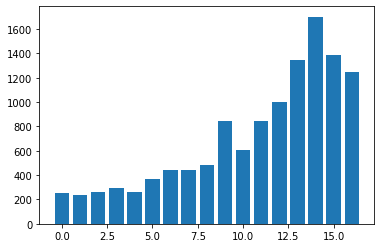

1


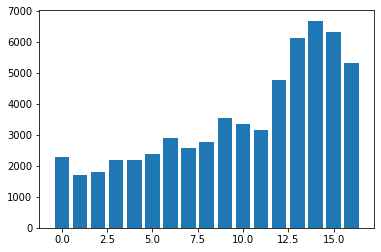

2


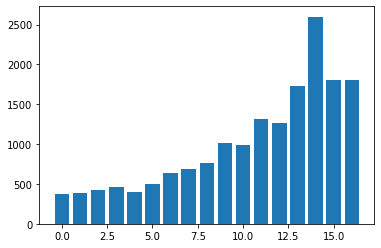

3


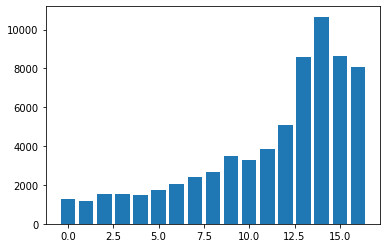

4


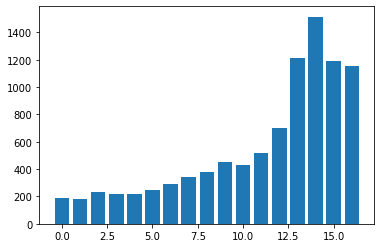

5


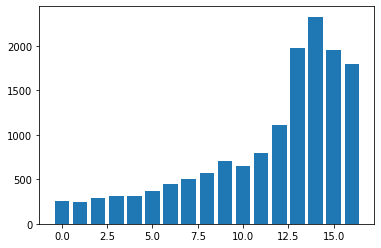

6


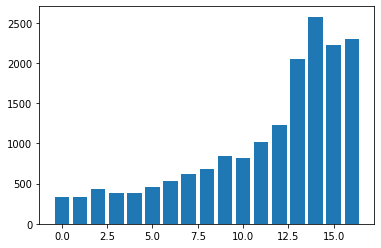

7


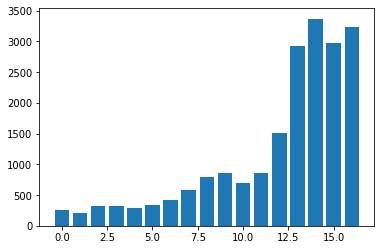

8


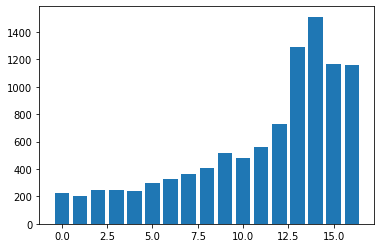

9


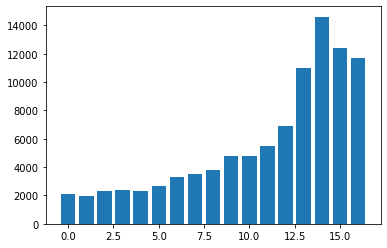

10


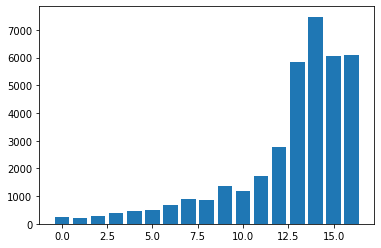

11


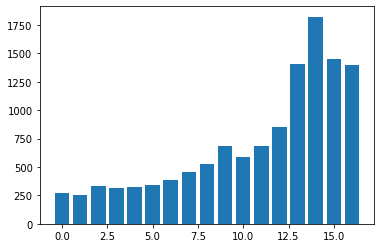

12


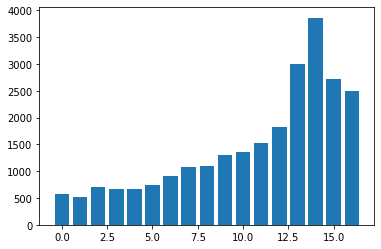

13


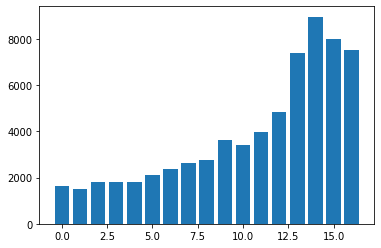

14


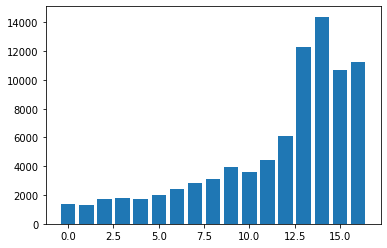

15


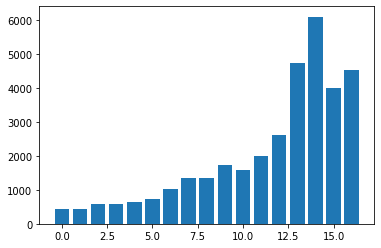

16


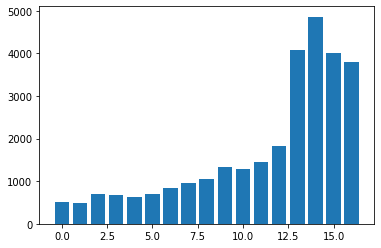

17


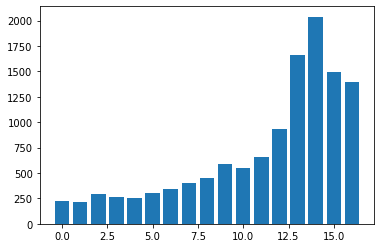

18


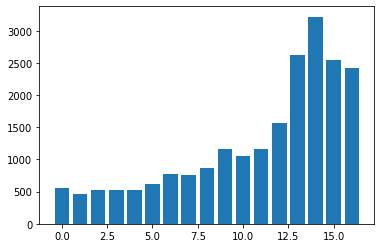

19


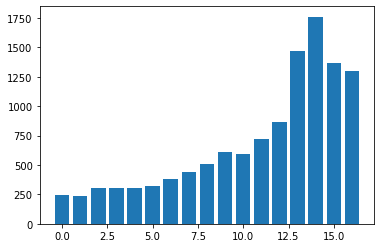

20


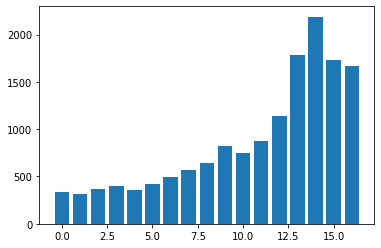

21


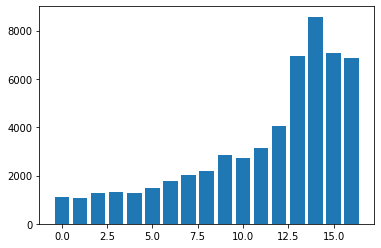

22


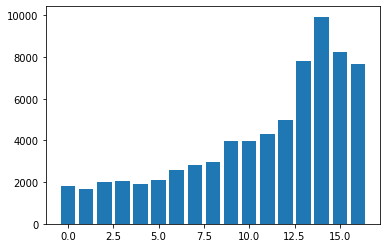

23


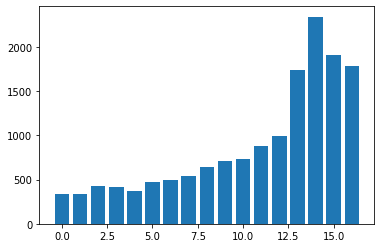

24


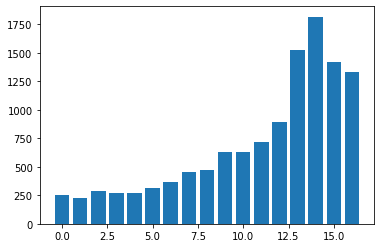

25


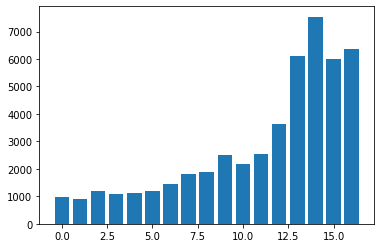

In [29]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month[i][j] for i in range(17)])
    plt.show()


0


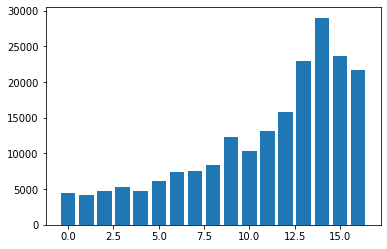

1


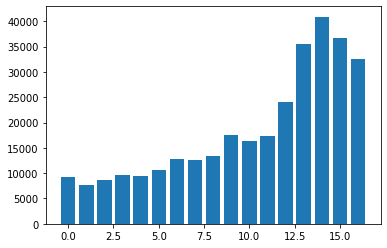

2


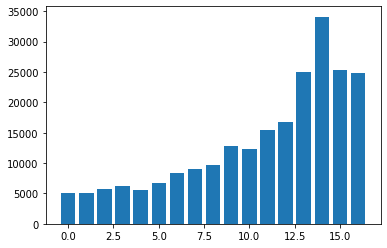

3


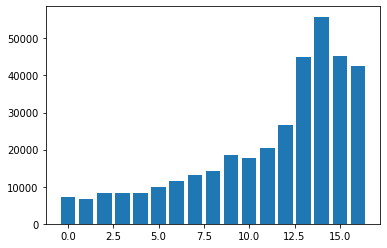

4


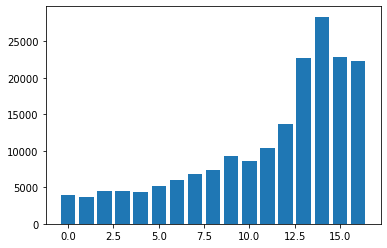

5


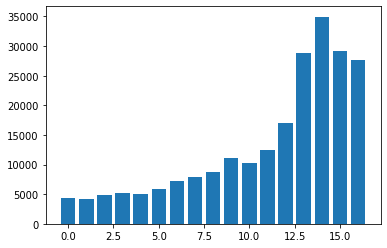

6


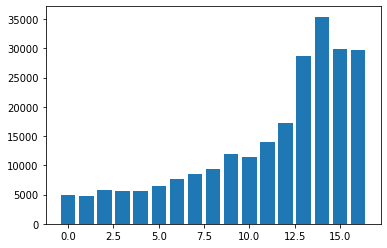

7


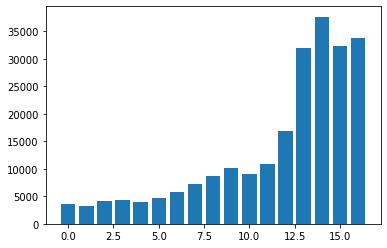

8


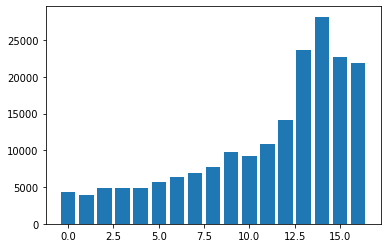

9


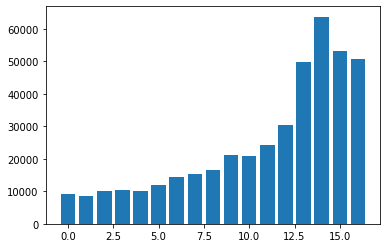

10


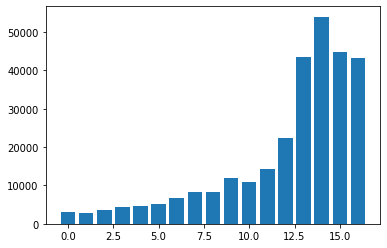

11


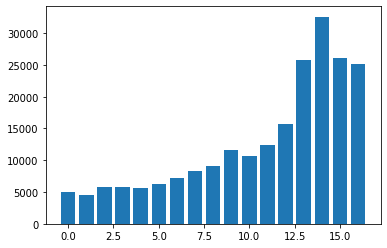

12


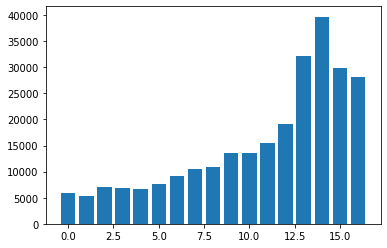

13


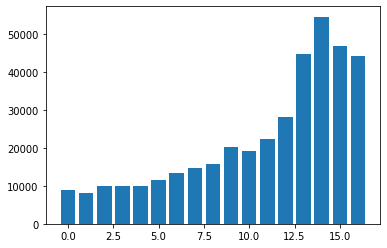

14


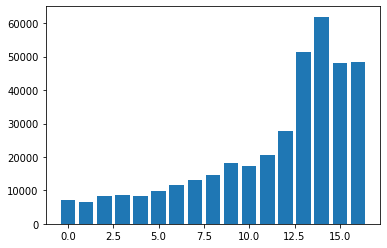

15


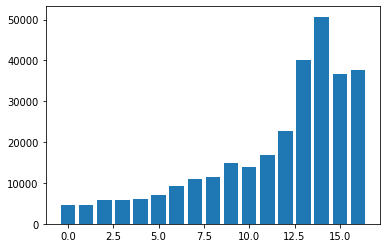

16


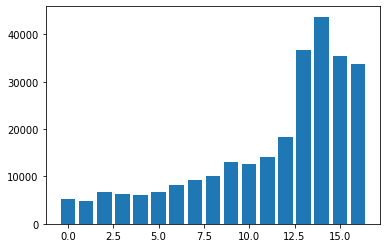

17


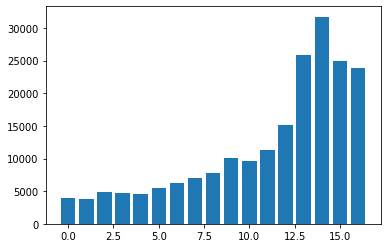

18


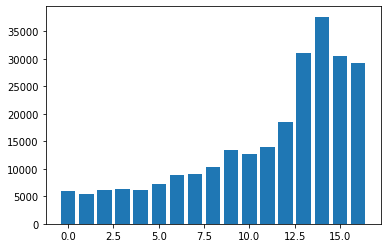

19


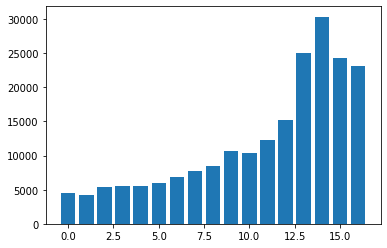

20


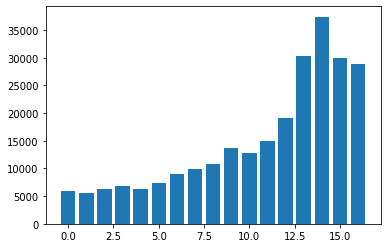

21


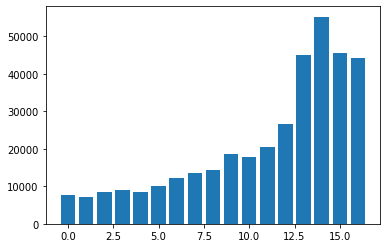

22


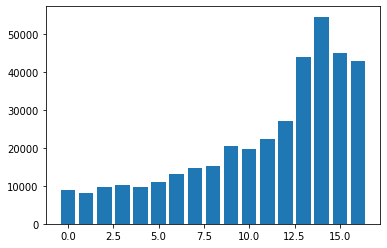

23


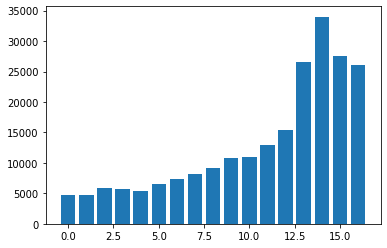

24


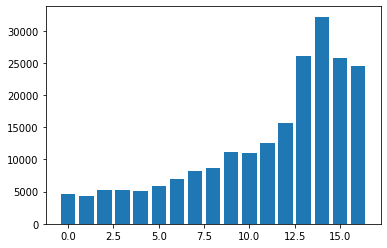

25


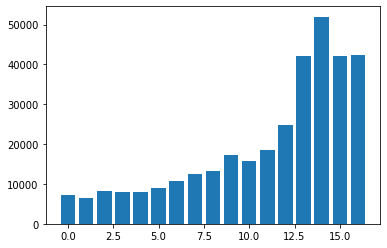

In [30]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month[i][j] for i in range(17)])
    plt.show()


0


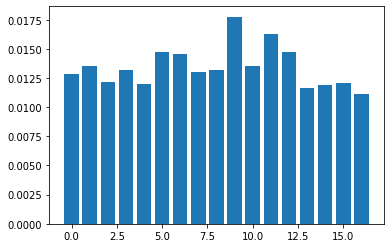

1


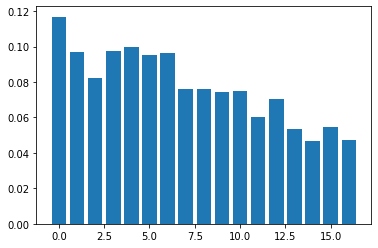

2


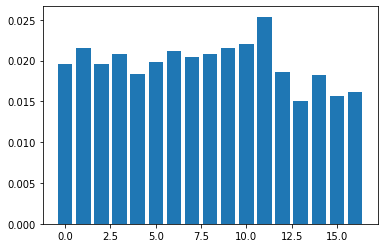

3


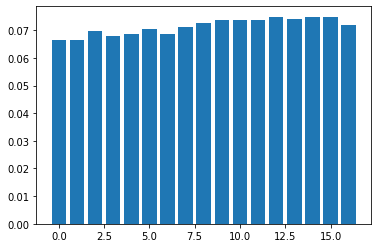

4


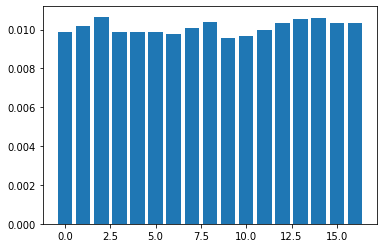

5


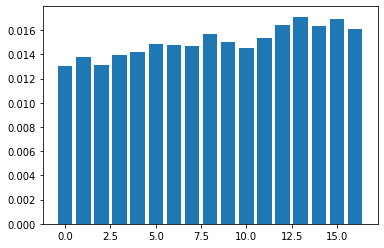

6


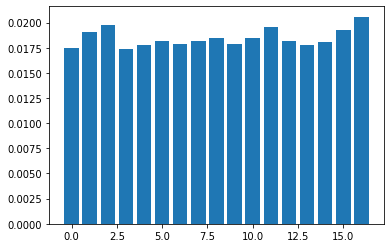

7


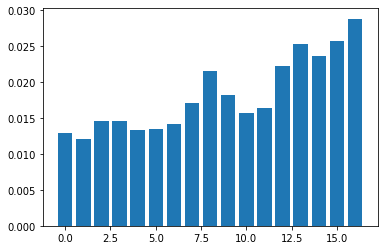

8


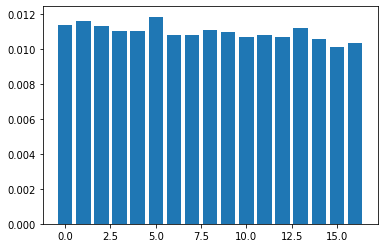

9


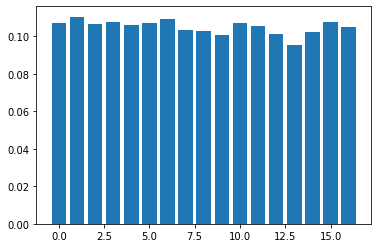

10


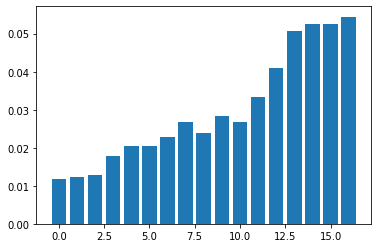

11


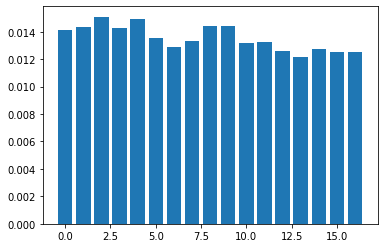

12


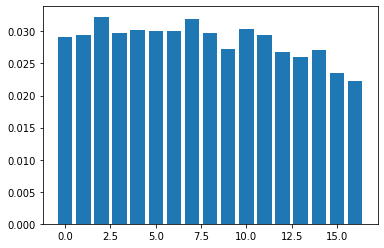

13


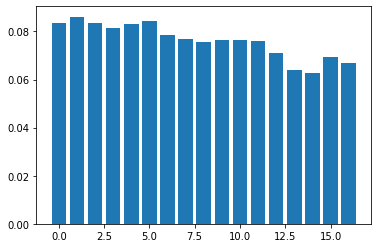

14


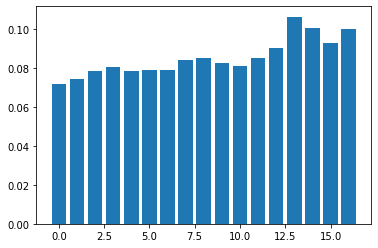

15


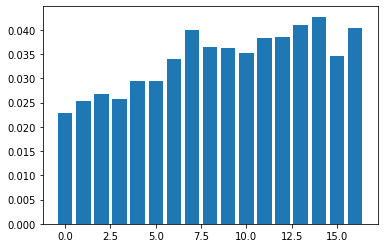

16


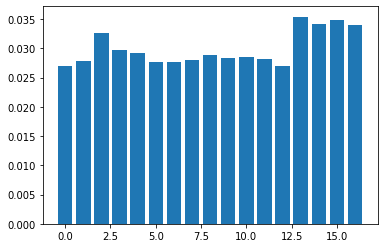

17


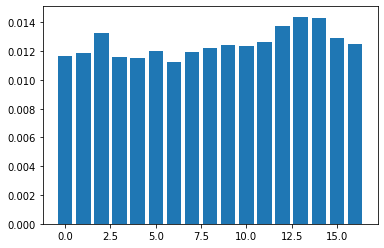

18


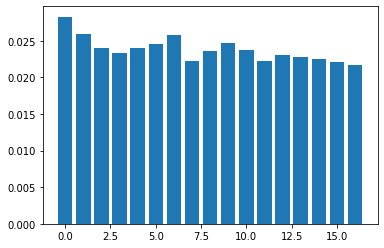

19


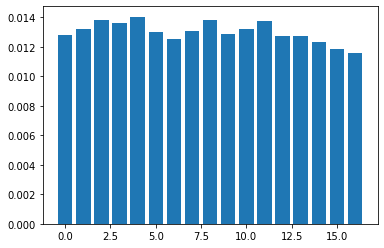

20


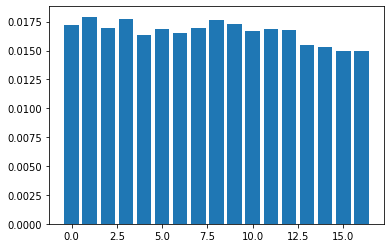

21


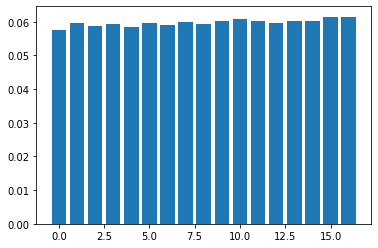

22


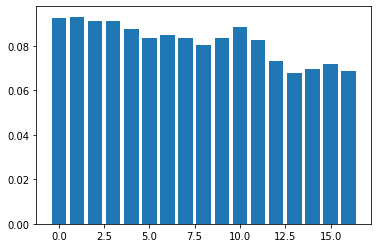

23


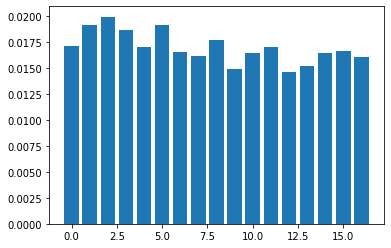

24


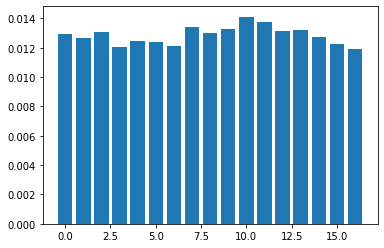

25


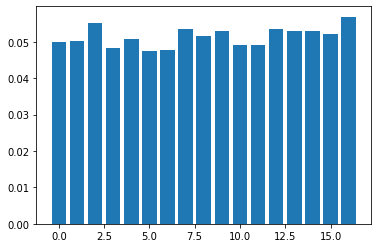

In [31]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month[i][j]/len(politics_corpus_by_month[i]) for i in range(17)])
    plt.show()


Increases: 7, 10, 14, 15

Decreases: 1, 22 

(others for both but less so)



In [40]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_amounts_by_month[i][j]/len(politics_corpus_by_month[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.9387254901960785
6.407394374216314e-07

3
0.8823529411764707
7.220902878692295e-05

5
0.9044117647058825
1.6254653625545185e-05

7
0.9191176470588237
4.851113328201011e-06

8
-0.786764705882353
0.004657031290396742

10
0.9950980392156863
4.477365689260488e-15

11
-0.7720588235294118
0.00733232882322009

13
-0.9338235294117647
1.1248450167431798e-06

14
0.9362745098039217
8.536888851472477e-07

15
0.8480392156862745
0.00044363301723583957

18
-0.7843137254901962
0.005034942722489742

20
-0.7230392156862746
0.027026339901538122

21
0.8088235294117647
0.0021995207263852345

22
-0.8995098039215688
2.3308527776318215e-05

23
-0.7107843137254903
0.03594217126995061



0


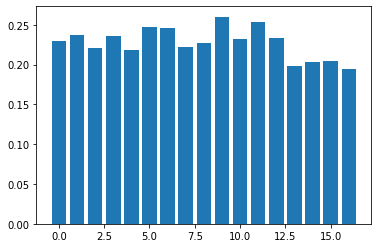

1


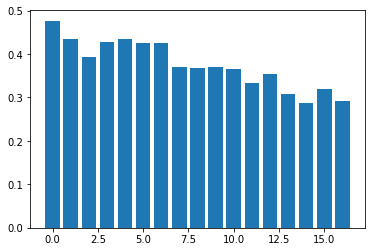

2


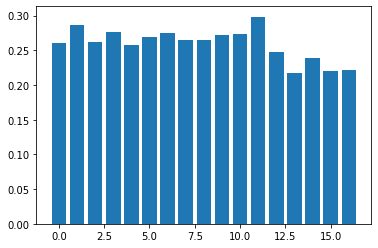

3


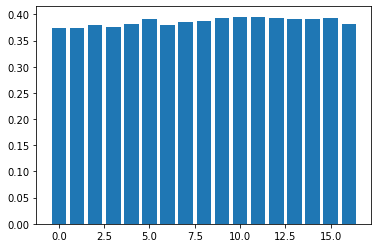

4


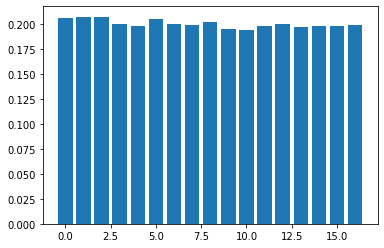

5


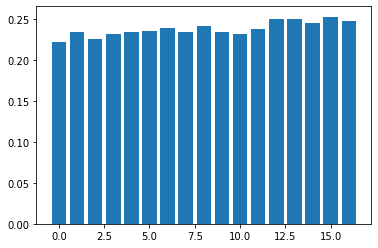

6


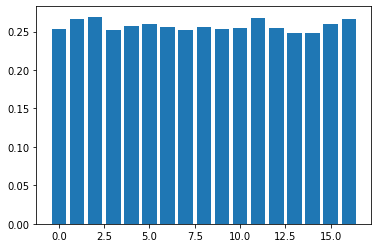

7


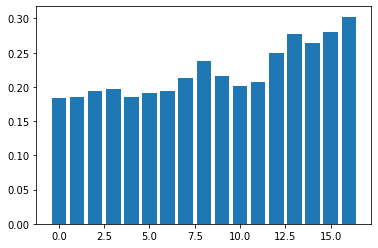

8


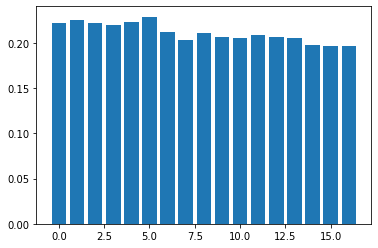

9


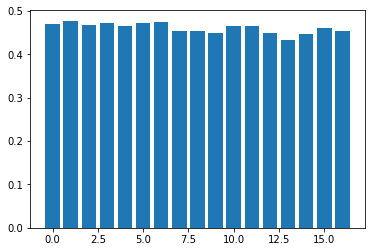

10


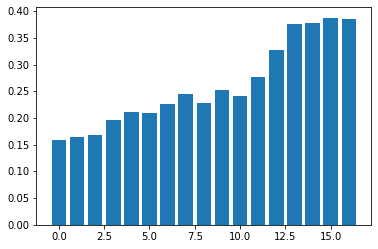

11


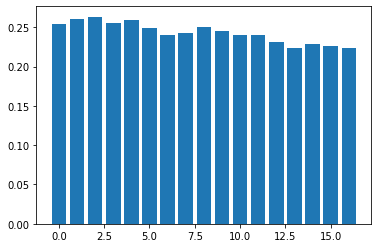

12


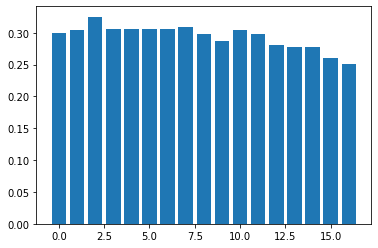

13


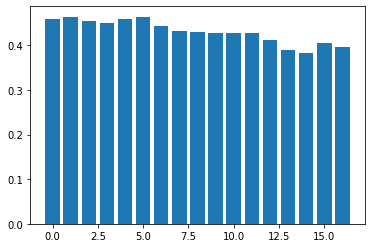

14


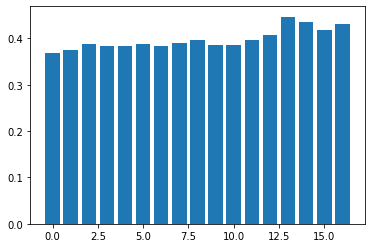

15


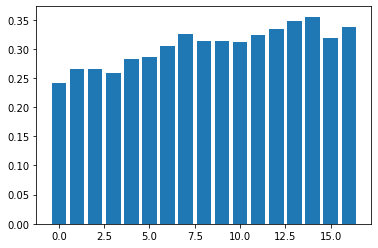

16


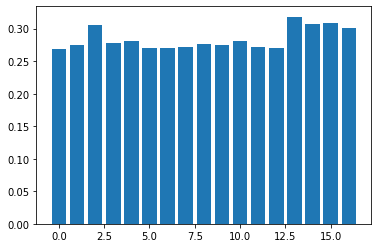

17


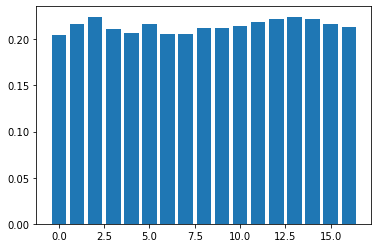

18


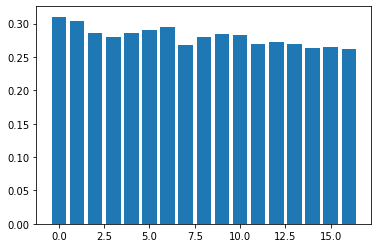

19


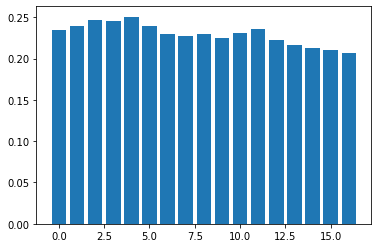

20


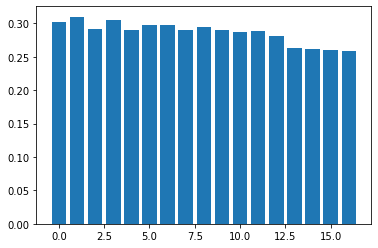

21


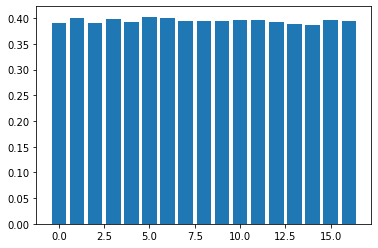

22


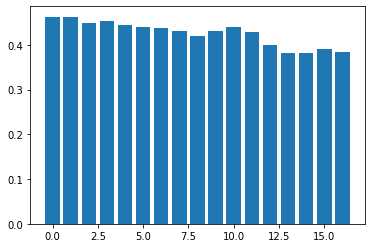

23


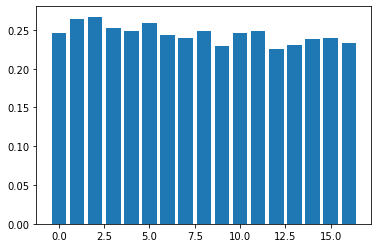

24


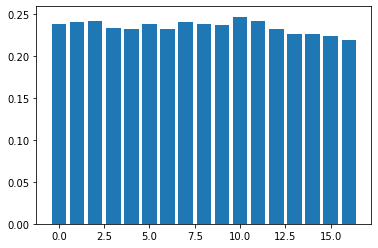

25


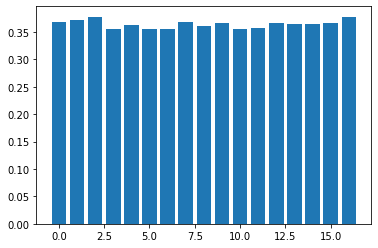

In [32]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month[i][j]/len(politics_corpus_by_month[i]) for i in range(17)])
    plt.show()


Increases: 7, 10, 15

Decreases: 1 

(others for both but less so)


In [41]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_occurrence_by_month[i][j]/len(politics_corpus_by_month[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.948529411764706
1.783494768042255e-07

5
0.7794117647058825
0.005868162468593595

7
0.931372549019608
1.4669369255238205e-06

8
-0.8725490196078433
0.00012777946152244283

9
-0.7769607843137256
0.006326198607681029

10
0.982843137254902
5.2023764627027125e-11

11
-0.9264705882352943
2.425769404145967e-06

12
-0.7892156862745099
0.004303183562031087

13
-0.9166666666666667
6.024503044656143e-06

14
0.8676470588235294
0.00016708831241007556

15
0.9019607843137255
1.9510397142911782e-05

18
-0.8504901960784315
0.00039564902337272013

19
-0.8455882352941178
0.0004964628691731645

20
-0.9264705882352943
2.425769404145967e-06

22
-0.9264705882352943
2.425769404145967e-06

23
-0.7009803921568628
0.044704691173288624



In [47]:
print(np.argsort(np.array(topic_occurrence_by_month[-1]) / np.array(topic_occurrence_by_month[0])))
print(np.argsort(np.array(topic_amounts_by_month[-1]) / np.array(topic_amounts_by_month[0])))

[ 1 22 12 18  0  2 20 13 19 11  8 24 23  4  9 21  3 25 17  6  5 16 14 15
  7 10]
[ 1 22 12 18 13  2 20  0 11 19  8 24 23  9  4 21 17  3 25  6  5 16 14 15
  7 10]


Greatest increase: 10
Greatest decrease: 1

## By user

In [48]:
user_tokens_by_month = []

for i in range(17):
    with open("stored_variables/politics_tokens_auth_sample_month" + str(i) + ".json", 'r') as f:
        user_tokens_by_month.append(json.load(f))

In [49]:
users_by_month = []

for i in range(17):
    with open("stored_variables/auth_sample_r_politics_authors_month" + str(i) + ".json", 'r') as f:
        users_by_month.append(json.load(f))

In [68]:
with open("stored_variables/user_subreddit_tf.pickle", "rb") as f:
    subreddit_tf = pickle.load(f)

In [65]:
with open("stored_variables/user_subreddit_tf_auths.pickle", "rb") as f:
    author_names = pickle.load(f)

In [70]:
with open("stored_variables/user_subreddit_tf_subreddit_names.pickle", "rb") as f:
    subreddit_reverse_dict = pickle.load(f)

In [52]:
user_corpus_by_month = [[politics_dictionary.doc2bow(text) for text in month] for month in user_tokens_by_month]

In [53]:
# number of document equivalents for each topic by month
topic_amounts_by_month_user = []

# number of documents each topic appears in by month
topic_occurrence_by_month_user = []

for corpus in user_corpus_by_month:
    curr_amounts = [0] * 26
    curr_occurrence = [0] * 26

    for doc in corpus:
        lda_res = politics_ldamodel26[doc]
        for topic_num, proportion in lda_res:
            curr_amounts[topic_num] += proportion
            curr_occurrence[topic_num] += 1
            
    topic_amounts_by_month_user.append(curr_amounts)
    topic_occurrence_by_month_user.append(curr_occurrence)

0


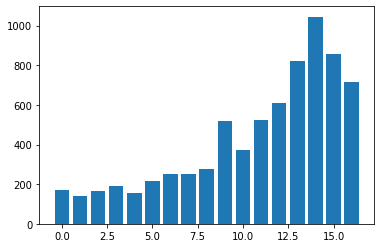

1


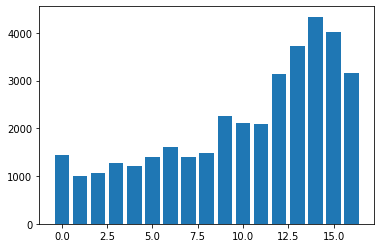

2


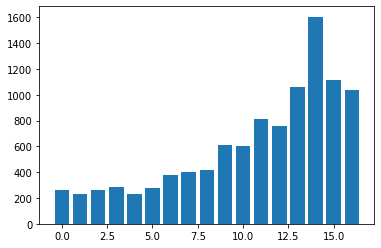

3


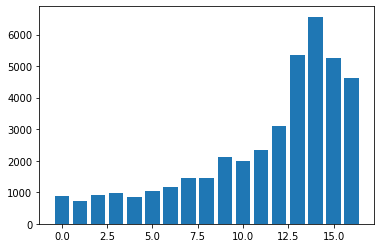

4


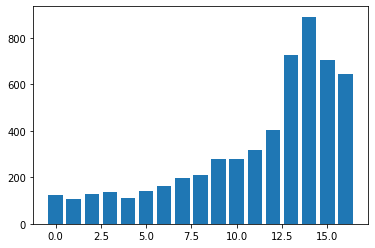

5


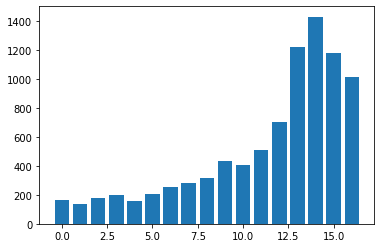

6


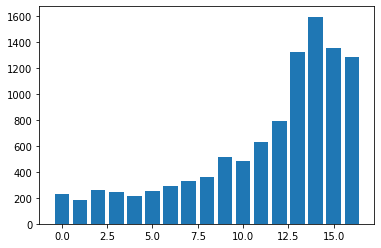

7


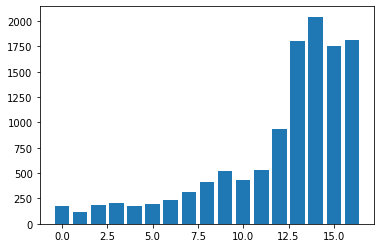

8


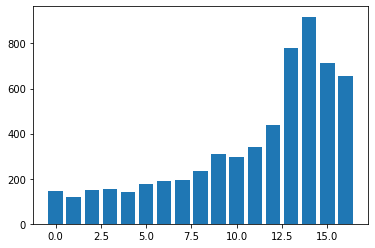

9


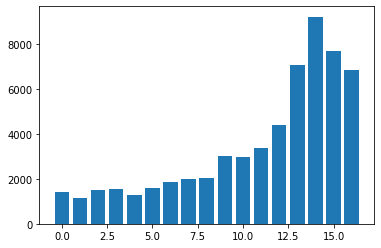

10


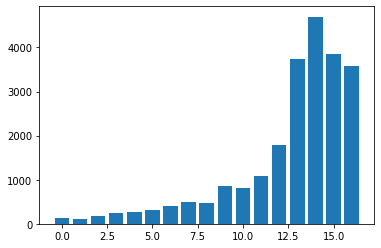

11


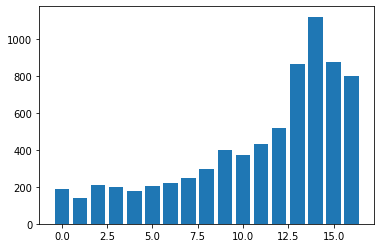

12


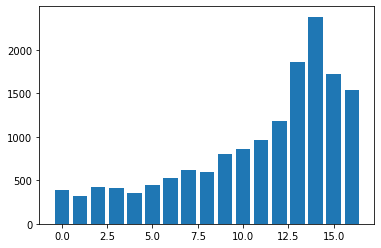

13


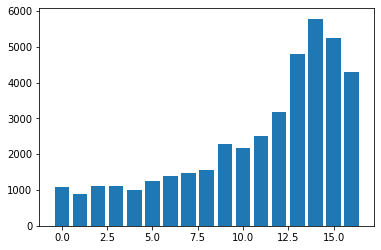

14


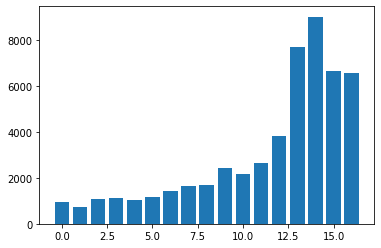

15


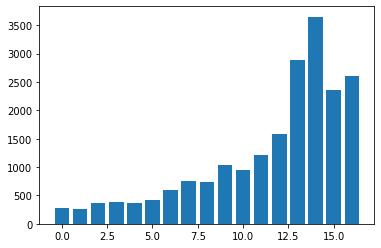

16


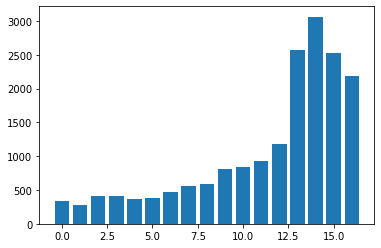

17


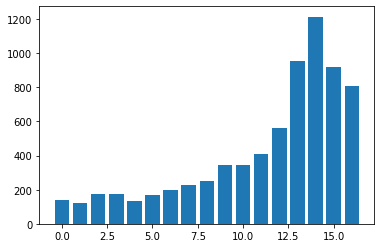

18


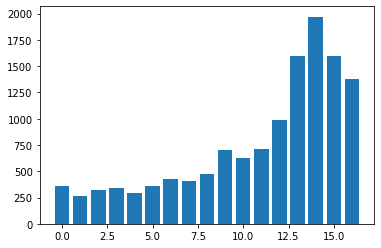

19


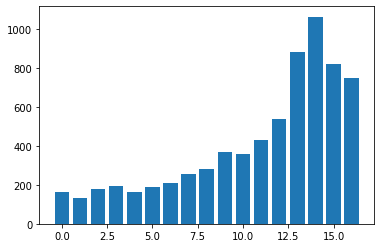

20


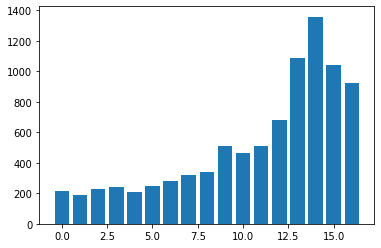

21


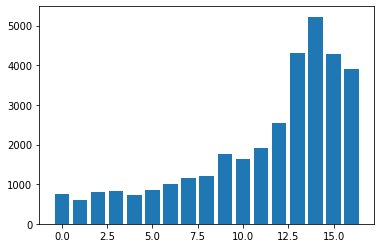

22


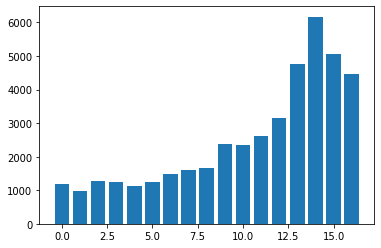

23


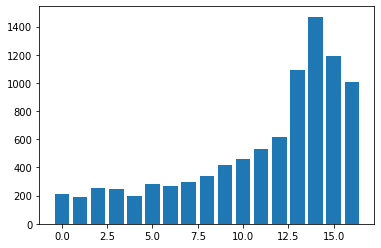

24


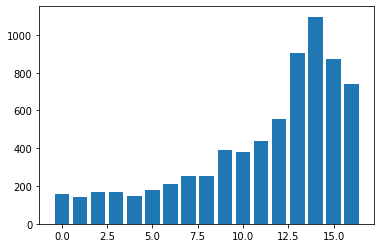

25


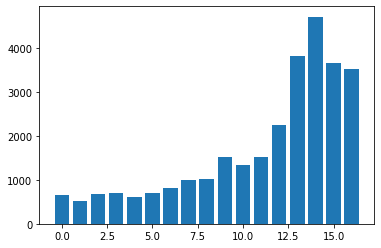

In [54]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month_user[i][j] for i in range(17)])
    plt.show()


0


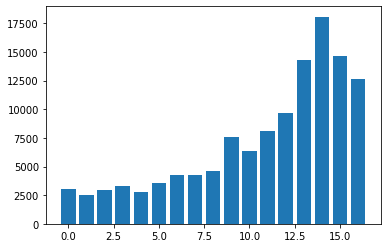

1


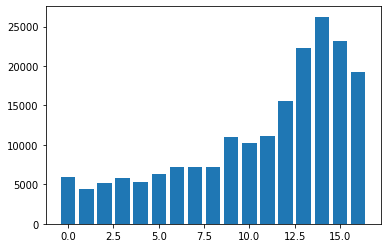

2


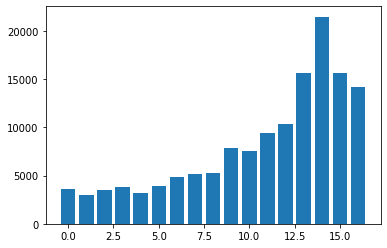

3


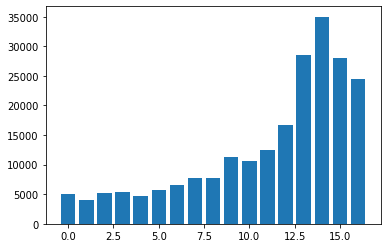

4


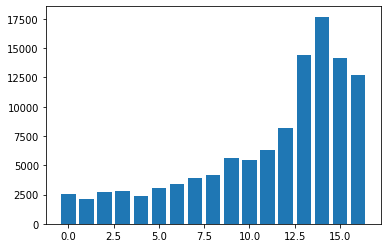

5


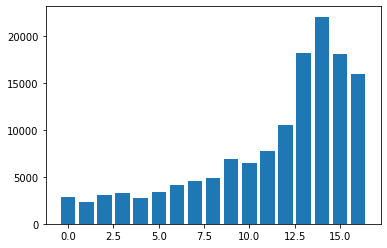

6


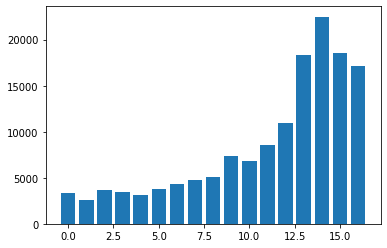

7


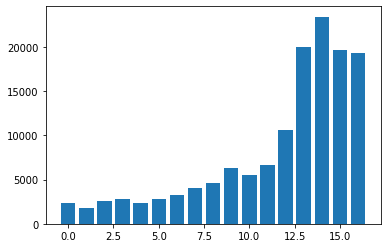

8


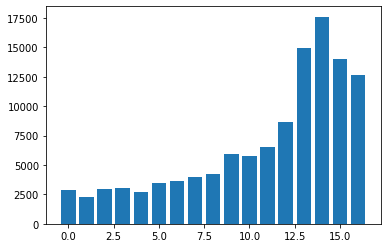

9


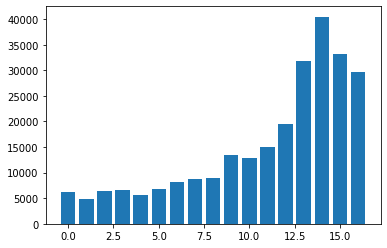

10


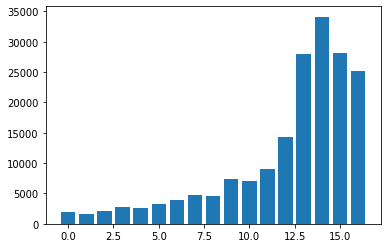

11


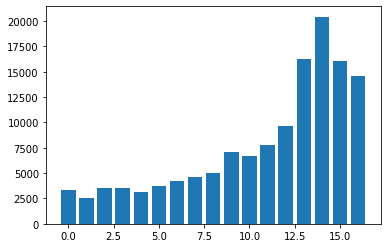

12


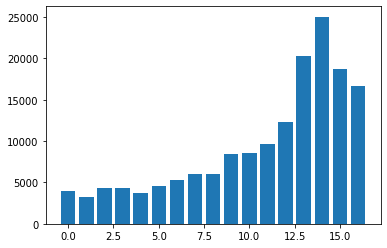

13


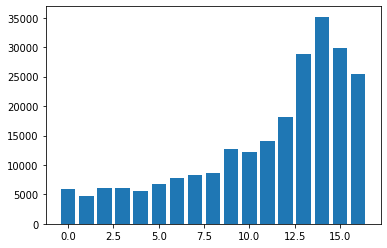

14


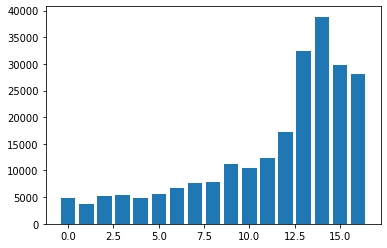

15


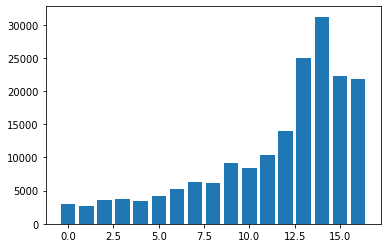

16


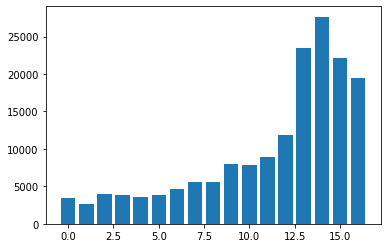

17


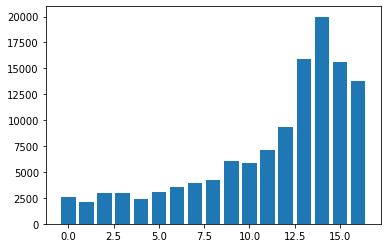

18


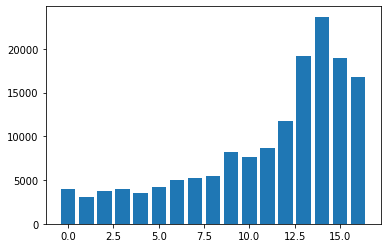

19


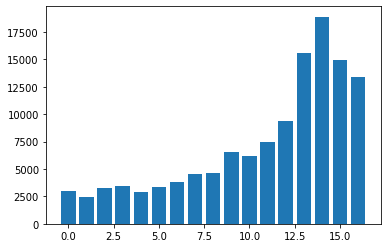

20


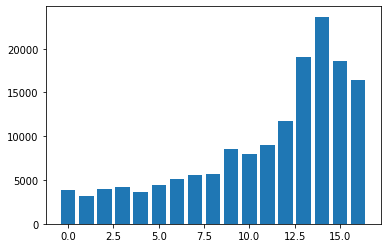

21


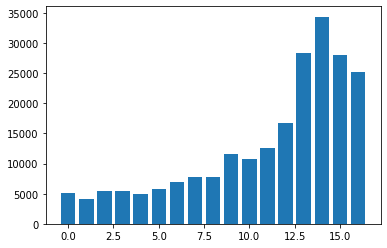

22


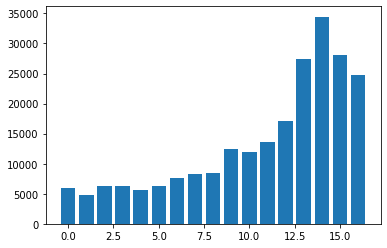

23


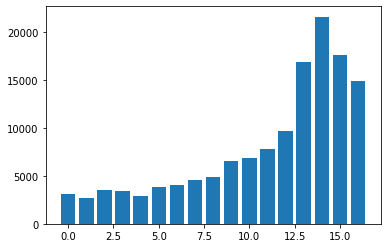

24


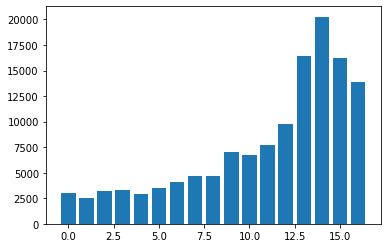

25


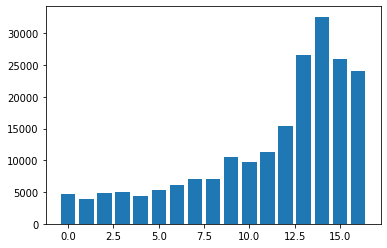

In [55]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month_user[i][j] for i in range(17)])
    plt.show()


0


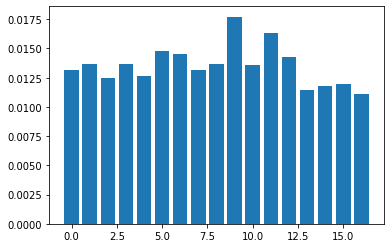

1


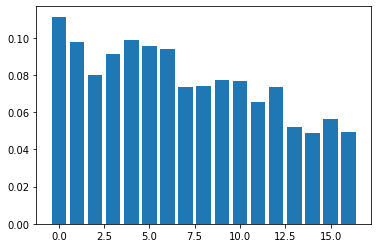

2


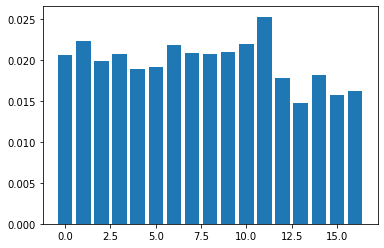

3


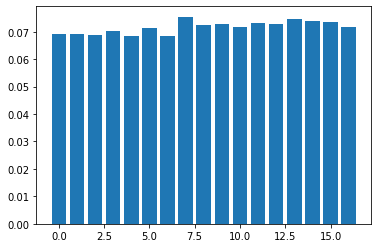

4


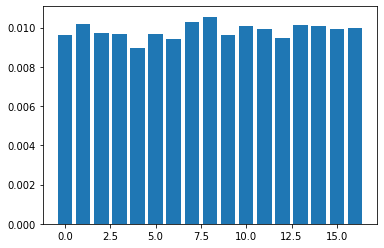

5


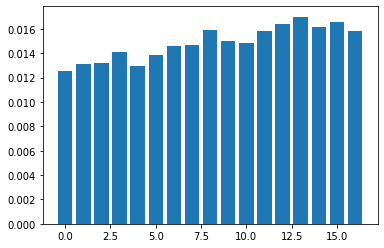

6


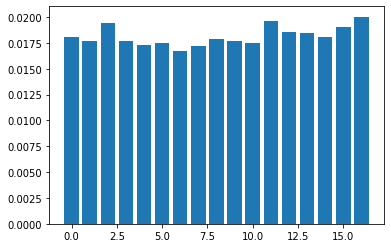

7


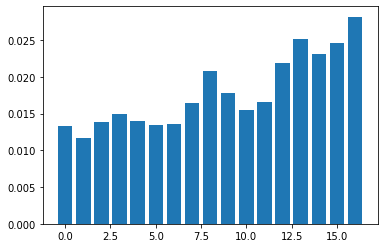

8


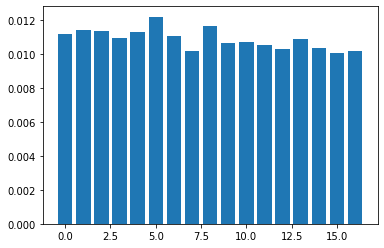

9


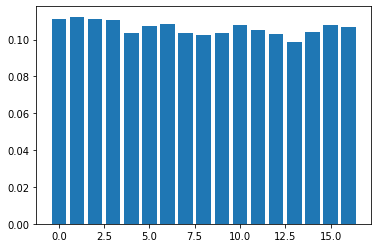

10


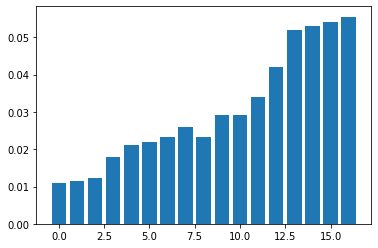

11


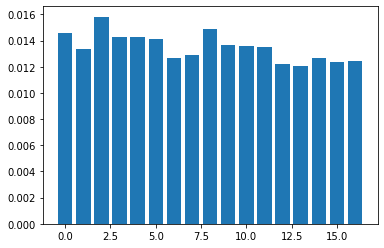

12


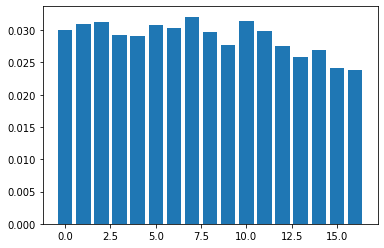

13


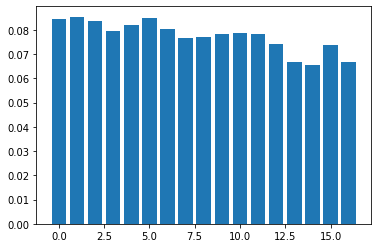

14


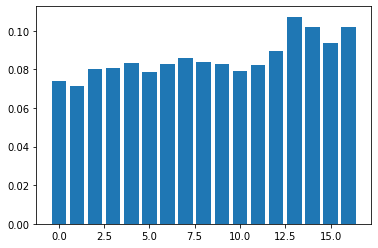

15


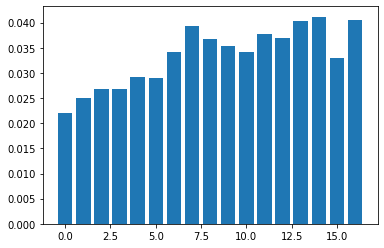

16


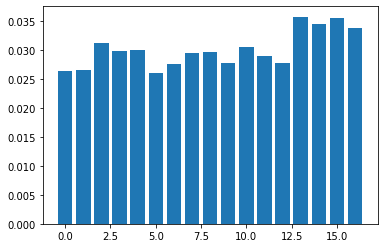

17


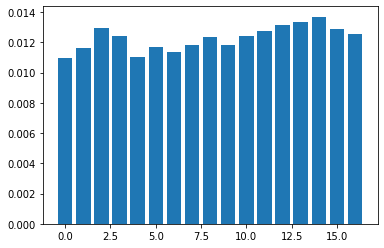

18


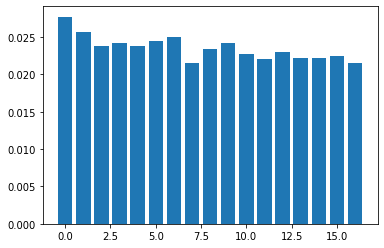

19


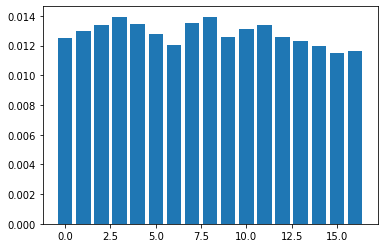

20


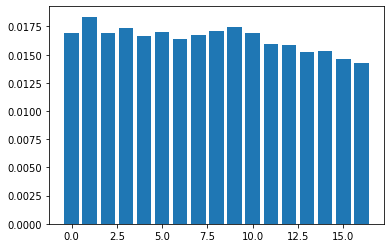

21


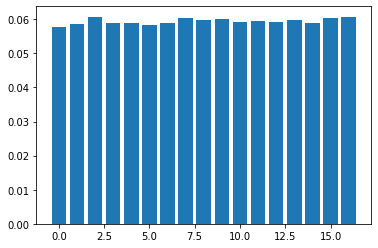

22


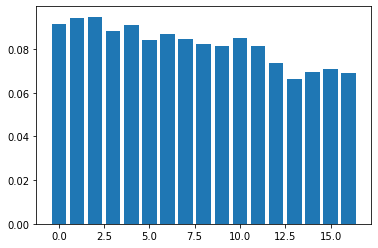

23


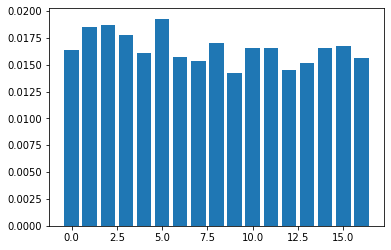

24


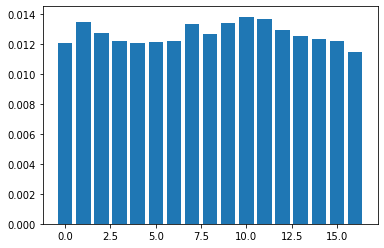

25


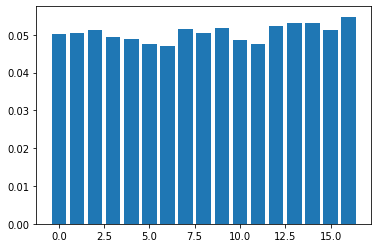

In [56]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month_user[i][j]/len(user_corpus_by_month[i]) for i in range(17)])
    plt.show()


In [57]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_amounts_by_month_user[i][j]/len(user_corpus_by_month[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.9166666666666667
6.024503044656143e-06

3
0.6960784313725491
0.04970236322913793

5
0.8946078431372549
3.283061387941013e-05

7
0.9215686274509804
3.8794128875130795e-06

8
-0.7549019607843138
0.01196775872610858

10
0.9926470588235295
9.303511939028647e-14

11
-0.7156862745098039
0.03212322882044523

13
-0.9068627450980394
1.3475468526912046e-05

14
0.806372549019608
0.002401668763721307

15
0.823529411764706
0.0012629638696830233

17
0.6960784313725491
0.04970236322913793

18
-0.7769607843137256
0.006326198607681029

20
-0.7279411764705883
0.024014809899967546

22
-0.9362745098039217
8.536888851472477e-07



0


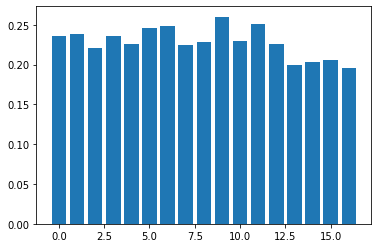

1


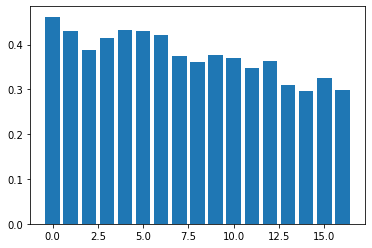

2


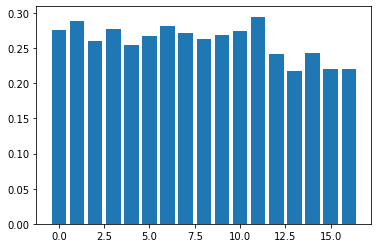

3


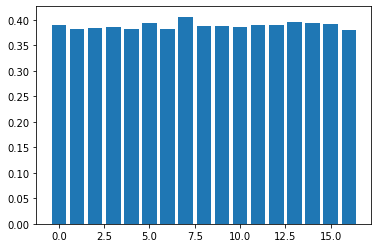

4


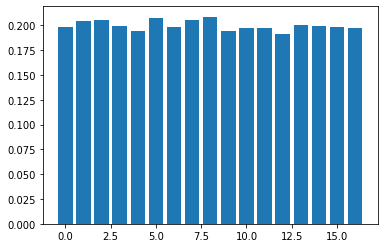

5


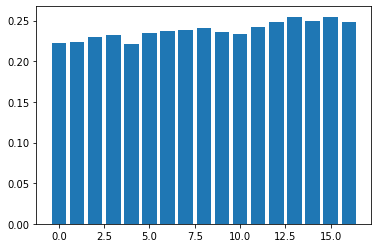

6


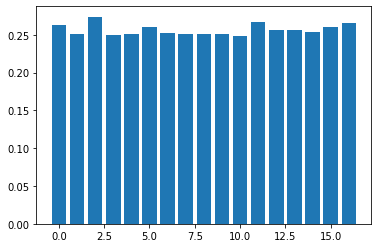

7


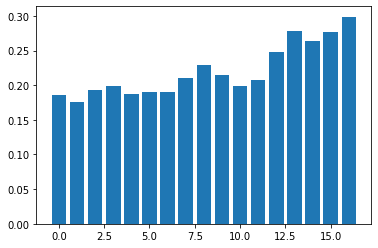

8


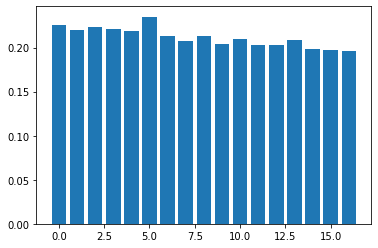

9


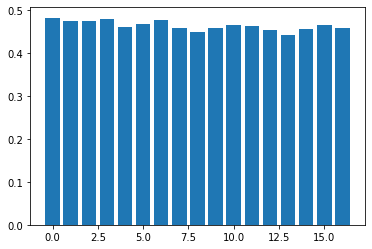

10


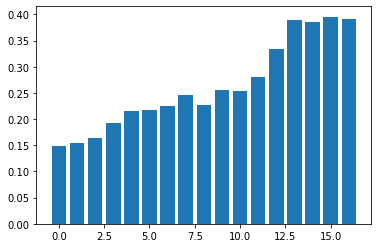

11


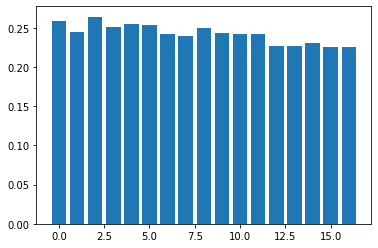

12


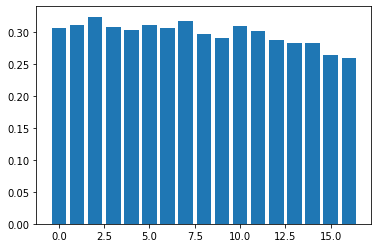

13


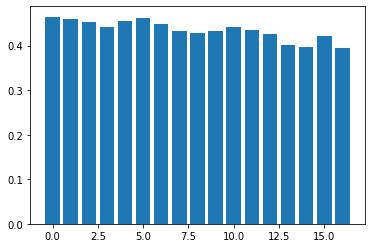

14


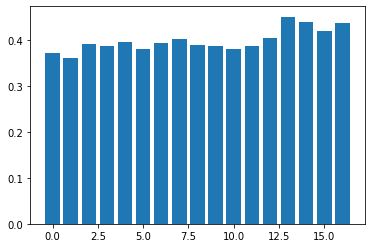

15


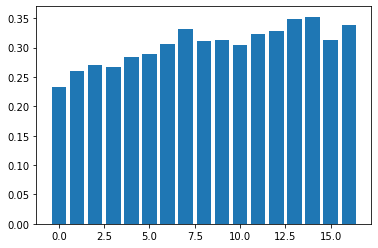

16


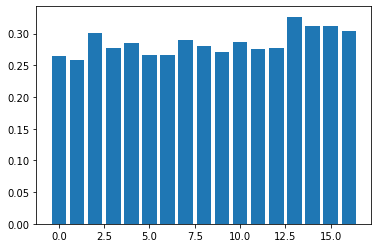

17


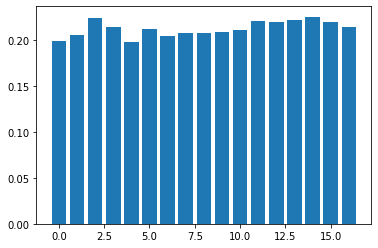

18


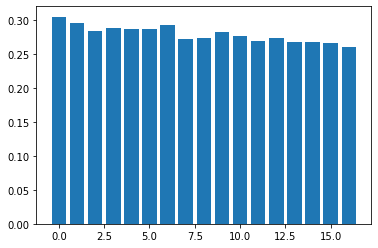

19


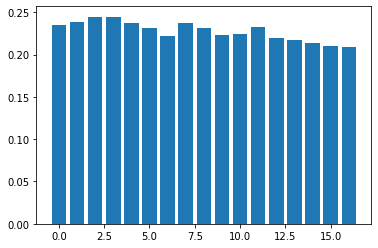

20


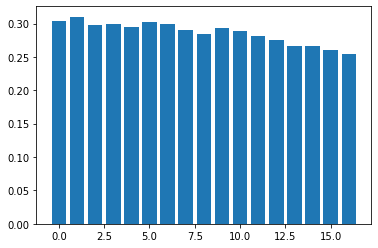

21


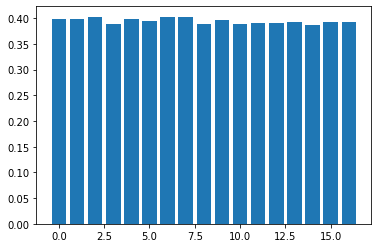

22


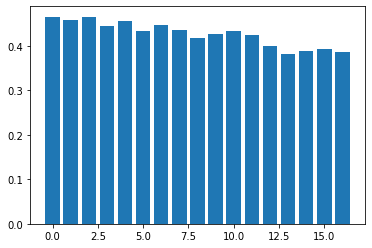

23


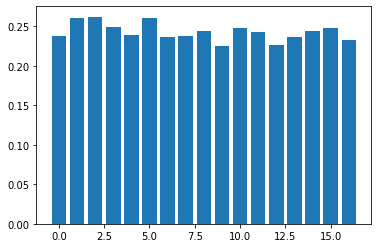

24


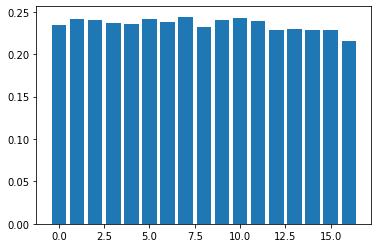

25


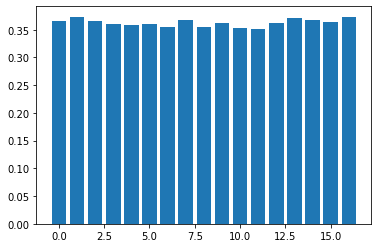

In [58]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month_user[i][j]/len(user_corpus_by_month[i]) for i in range(17)])
    plt.show()


In [61]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_occurrence_by_month_user[i][j]/len(user_corpus_by_month[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.9166666666666667
6.024503044656143e-06

5
0.9068627450980394
1.3475468526912046e-05

7
0.8946078431372549
3.283061387941013e-05

8
-0.911764705882353
9.115350346751888e-06

10
0.9901960784313727
7.991426171183857e-13

11
-0.8995098039215688
2.3308527776318215e-05

12
-0.7990196078431374
0.0031043236599405037

13
-0.9093137254901962
1.111348605756434e-05

15
0.8872549019607844
5.325608020167812e-05

18
-0.911764705882353
9.115350346751888e-06

19
-0.8676470588235294
0.00016708831241007556

20
-0.9509803921568628
1.2458567805627684e-07

22
-0.9411764705882353
4.7516494756381544e-07



In [60]:
print(np.argsort(np.array(topic_occurrence_by_month_user[-1]) / np.array(topic_occurrence_by_month_user[0])))
print(np.argsort(np.array(topic_amounts_by_month_user[-1]) / np.array(topic_amounts_by_month_user[0])))

[ 1  2 22  0 20 12 13 18  8 11 19 24  9 23  3 21  4  6 25 17  5 16 14 15
  7 10]
[ 1 22 18  2 13 12  0 20 11  8 19 24 23  9  3  4 21 25  6 17  5 16 14 15
  7 10]


Not exactly the same but similar in terms of which topics are increasing/decreasing

## Classify users based on which subreddits they have commented in

In [73]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}
num_sanders = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['sandersforpresident']]) for k in author_names}
num_trump = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['the_donald']]) for k in author_names}
num_clinton = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hillaryclinton']]) for k in author_names}


In [79]:
comment_threshold = 10

sanders_user_indices = []
trump_user_indices = []
none_user_indices = []

for lst in users_by_month:
    sanders_user_indices.append([i for i in range(len(lst)) if num_sanders[lst[i]] >= comment_threshold
                                 and num_trump[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    trump_user_indices.append([i for i in range(len(lst)) if num_trump[lst[i]] >= comment_threshold
                               and num_sanders[lst[i]] == 0 and num_clinton[lst[i]] == 0])
    none_user_indices.append([i for i in range(len(lst)) if num_sanders[lst[i]] == 0 
                              and num_trump[lst[i]]  == 0 and num_clinton[lst[i]] == 0])


In [80]:
for i in range(17):
    print(len(sanders_user_indices[i]))
    print(len(trump_user_indices[i]))
    print(len(none_user_indices[i]))
    print()


1129
92
7491

816
38
6182

1072
61
7298

1027
25
7937

1590
41
5995

1452
45
7358

2187
133
8424

2529
223
8575

2320
290
8502

4294
279
11939

3220
370
10789

3703
800
11322

5215
461
14187

7813
1329
20563

7044
2595
26577

5698
1496
19690

4302
2389
18404



In [82]:
topic_amounts_by_month_sanders = []
topic_occurrence_by_month_sanders = []

topic_amounts_by_month_trump = []
topic_occurrence_by_month_trump = []

topic_amounts_by_month_none = []
topic_occurrence_by_month_none = []

for i in range(17):
    curr_amounts_sanders = [0] * 26
    curr_occurrence_sanders = [0] * 26
    curr_amounts_trump = [0] * 26
    curr_occurrence_trump = [0] * 26
    curr_amounts_none = [0] * 26
    curr_occurrence_none = [0] * 26

    for j in range(len(user_corpus_by_month[i])):
        doc = user_corpus_by_month[i][j]
        lda_res = politics_ldamodel26[doc]
        
        if j in sanders_user_indices[i]:
            for topic_num, proportion in lda_res:
                curr_amounts_sanders[topic_num] += proportion
                curr_occurrence_sanders[topic_num] += 1
                
        elif j in trump_user_indices[i]:
            for topic_num, proportion in lda_res:
                curr_amounts_trump[topic_num] += proportion
                curr_occurrence_trump[topic_num] += 1
                
        elif j in none_user_indices[i]:
            for topic_num, proportion in lda_res:
                curr_amounts_none[topic_num] += proportion
                curr_occurrence_none[topic_num] += 1
        
    topic_amounts_by_month_sanders.append(curr_amounts_sanders)
    topic_occurrence_by_month_sanders.append(curr_occurrence_sanders)
    
    topic_amounts_by_month_trump.append(curr_amounts_trump)
    topic_occurrence_by_month_trump.append(curr_occurrence_trump)
    
    topic_amounts_by_month_none.append(curr_amounts_none)
    topic_occurrence_by_month_none.append(curr_occurrence_none)

### Sanders

0


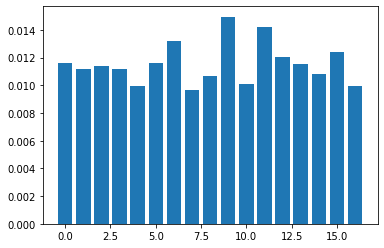

1


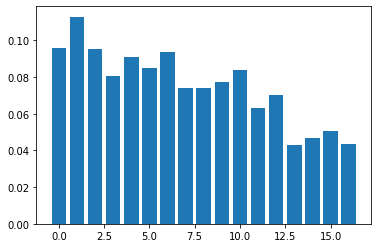

2


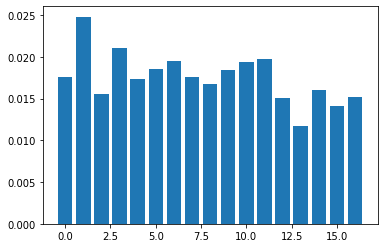

3


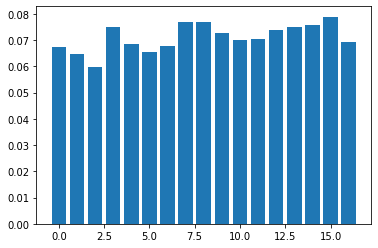

4


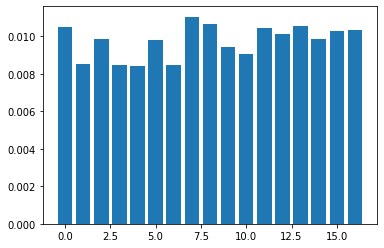

5


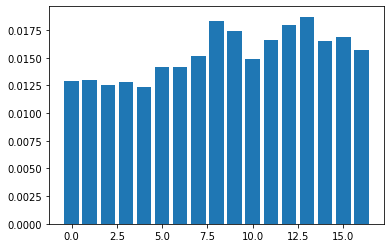

6


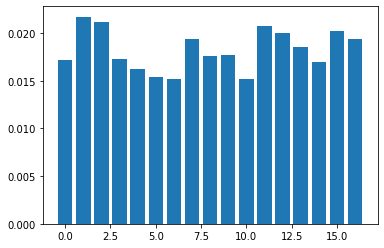

7


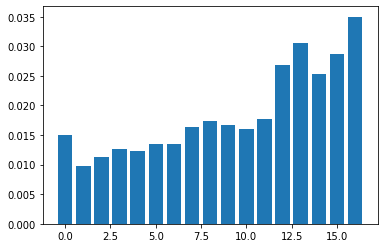

8


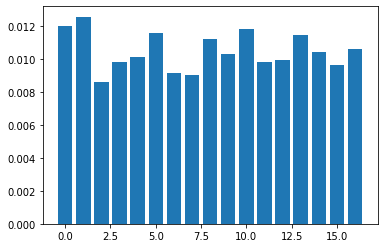

9


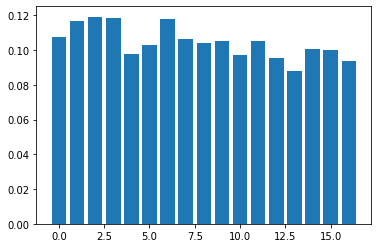

10


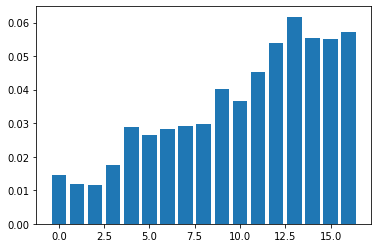

11


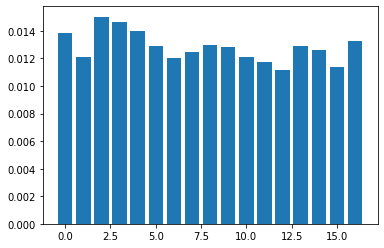

12


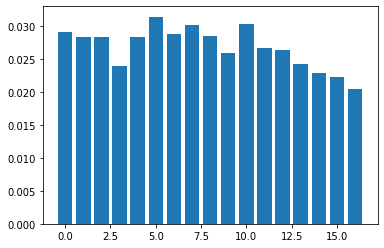

13


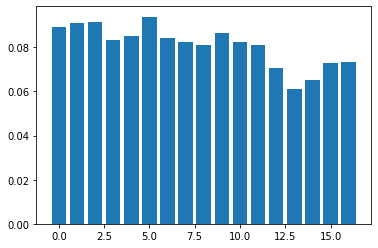

14


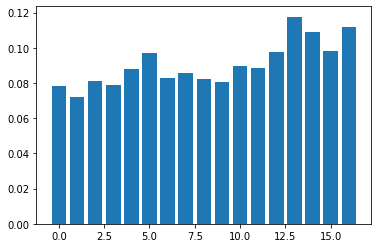

15


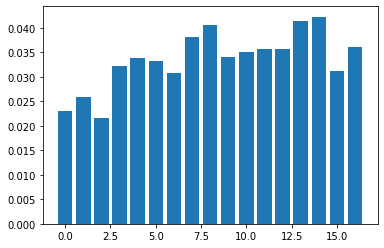

16


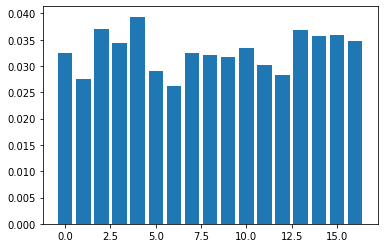

17


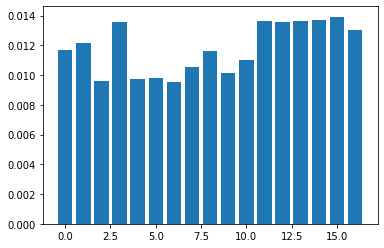

18


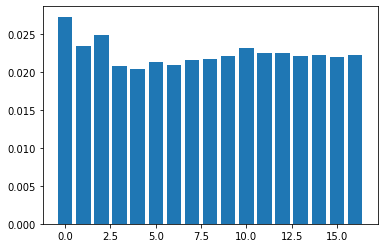

19


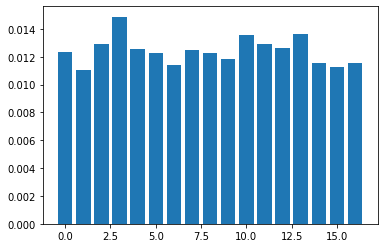

20


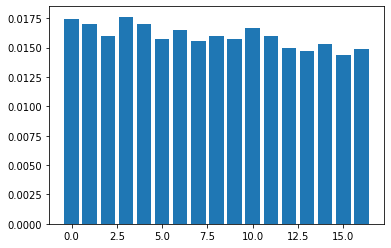

21


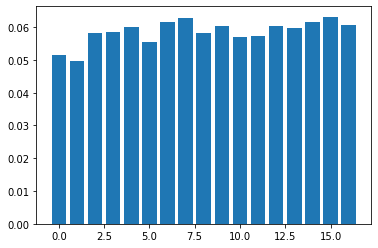

22


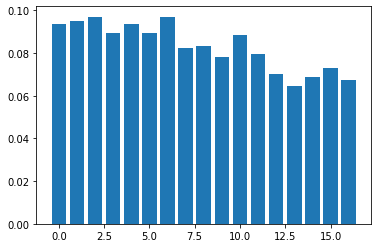

23


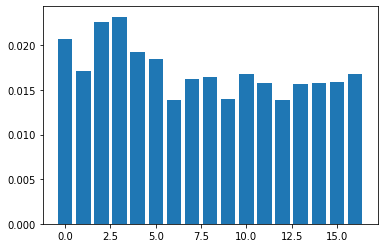

24


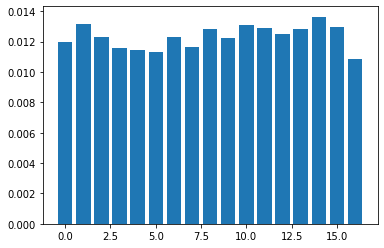

25


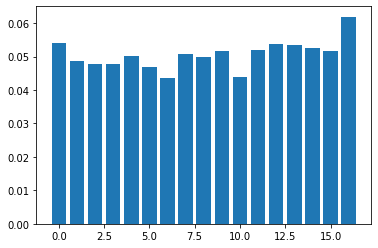

In [83]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month_sanders[i][j]/len(sanders_user_indices[i]) for i in range(17)])
    plt.show()


In [84]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_amounts_by_month_sanders[i][j]/len(sanders_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.9142156862745098
7.43325327654822e-06

5
0.7573529411764707
0.011185619095576776

7
0.9142156862745098
7.43325327654822e-06

9
-0.7401960784313727
0.017677917606924526

10
0.9632352941176472
1.4926587143107324e-08

13
-0.8480392156862745
0.00044363301723583957

14
0.8504901960784315
0.00039564902337272013

20
-0.8210784313725491
0.0013900514422976711

22
-0.8799019607843139
8.366546751089094e-05



0


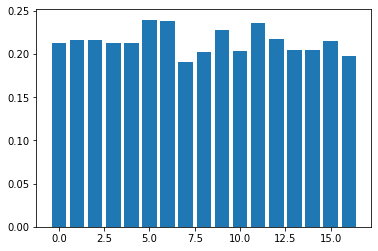

1


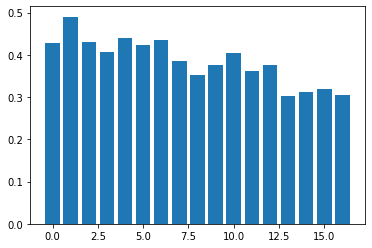

2


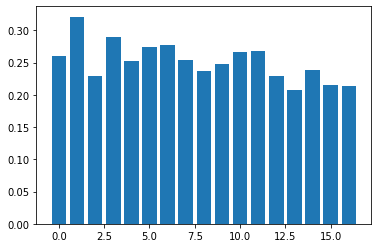

3


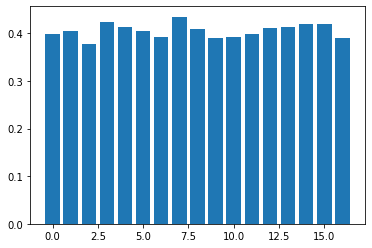

4


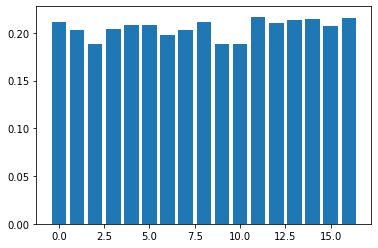

5


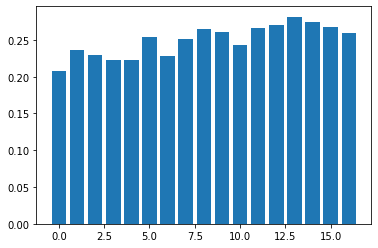

6


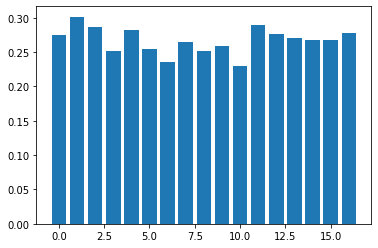

7


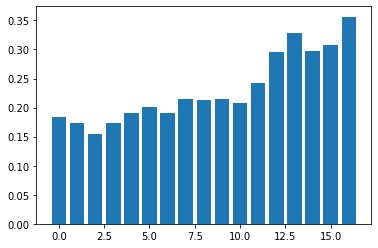

8


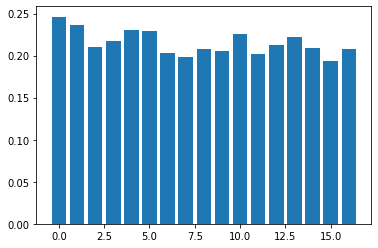

9


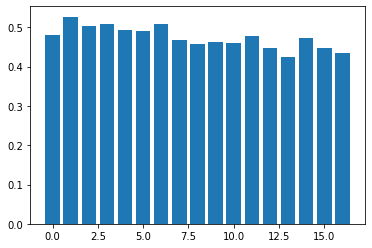

10


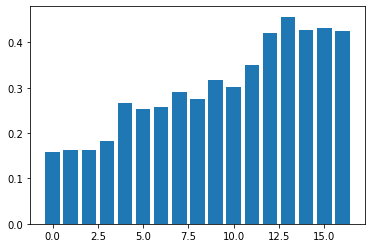

11


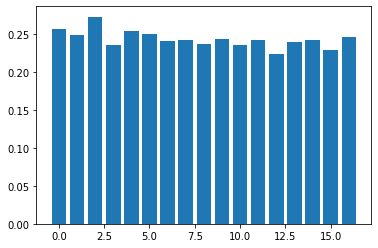

12


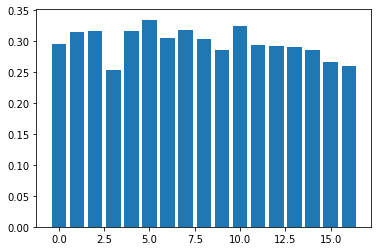

13


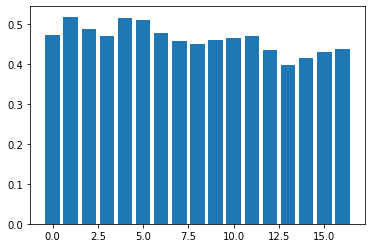

14


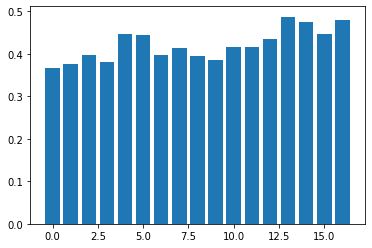

15


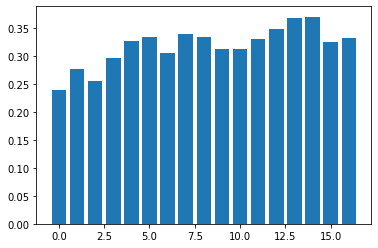

16


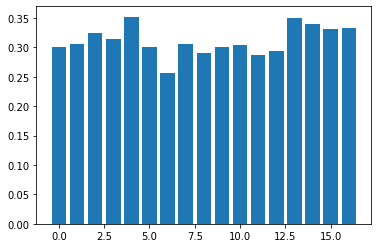

17


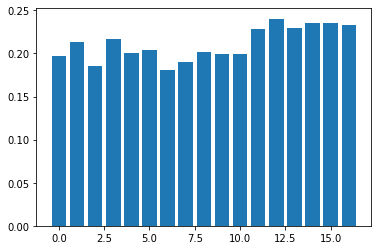

18


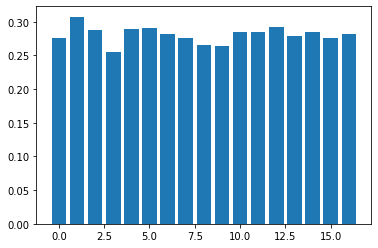

19


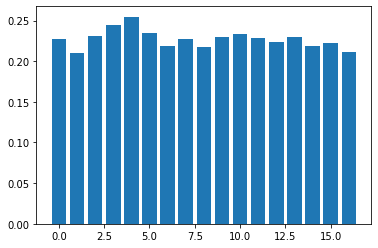

20


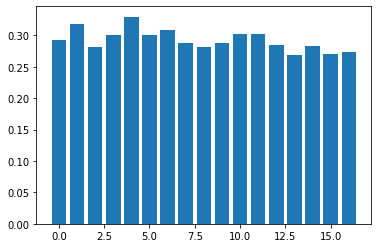

21


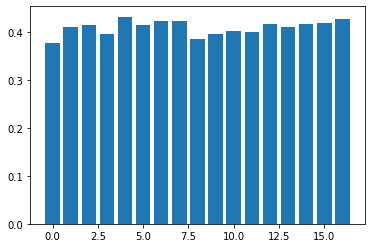

22


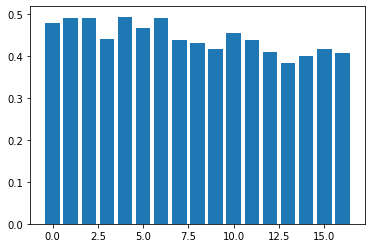

23


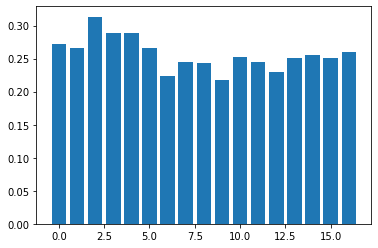

24


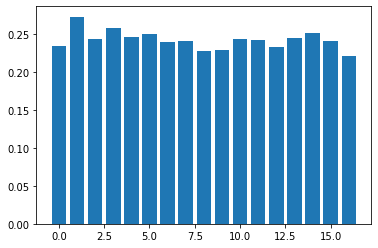

25


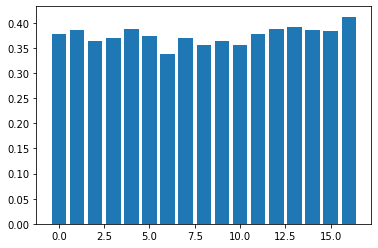

In [85]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month_sanders[i][j]/len(sanders_user_indices[i]) for i in range(17)])
    plt.show()


In [86]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_occurrence_by_month_sanders[i][j]/len(sanders_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.875
0.00011128300510932324

5
0.8259803921568629
0.001145827257656494

7
0.9411764705882353
4.7516494756381544e-07

9
-0.8161764705882354
0.0016768065313170896

10
0.965686274509804
8.960526531860074e-09

13
-0.8284313725490197
0.001038000874535397

14
0.7401960784313727
0.017677917606924526

22
-0.8308823529411766
0.0009388755859946585



### Trump

0


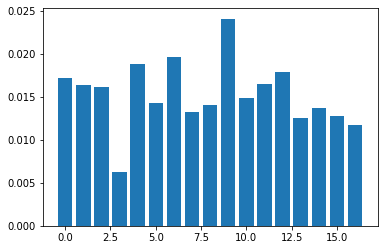

1


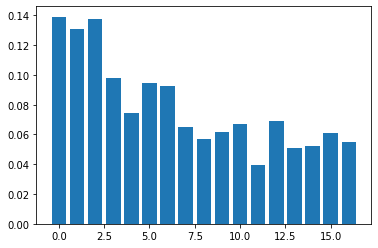

2


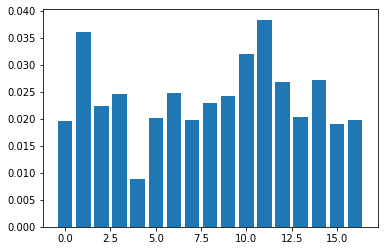

3


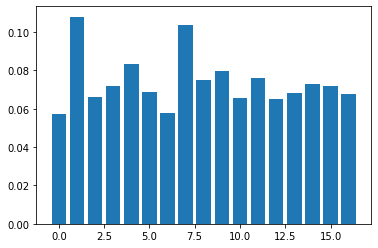

4


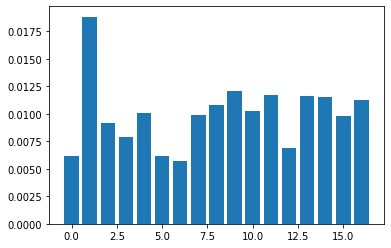

5


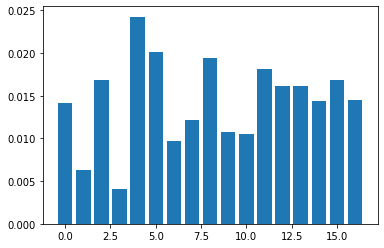

6


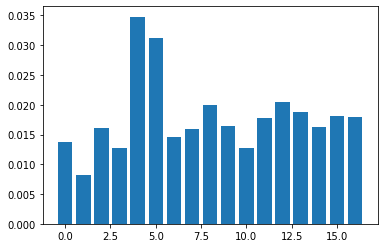

7


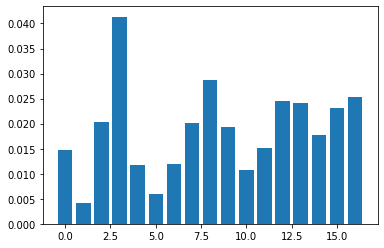

8


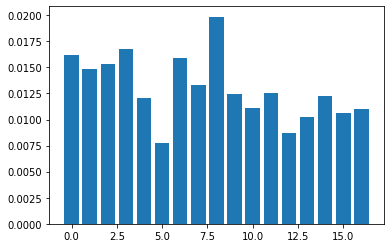

9


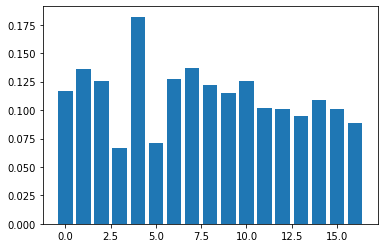

10


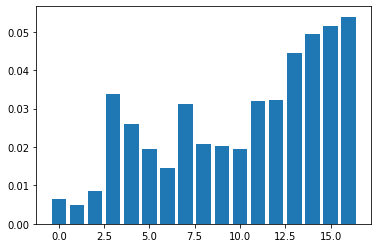

11


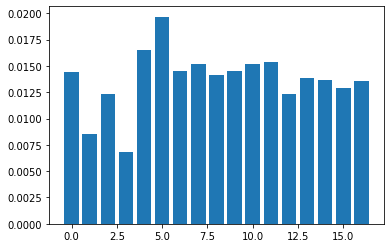

12


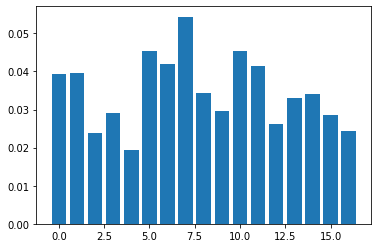

13


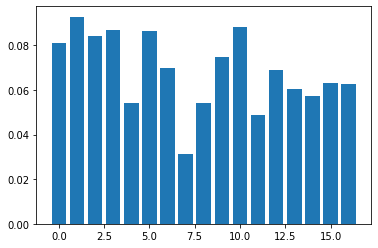

14


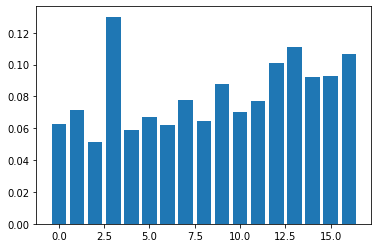

15


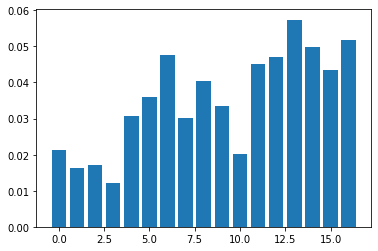

16


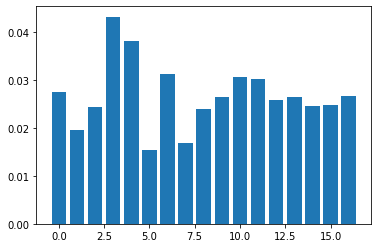

17


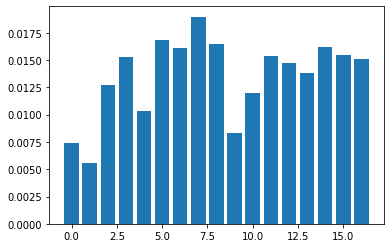

18


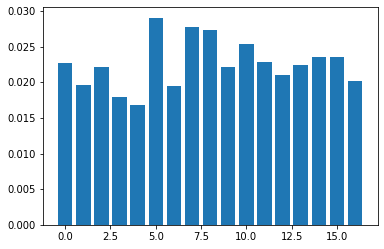

19


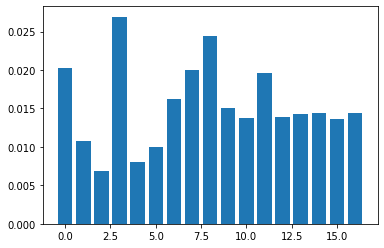

20


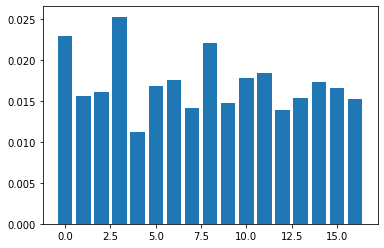

21


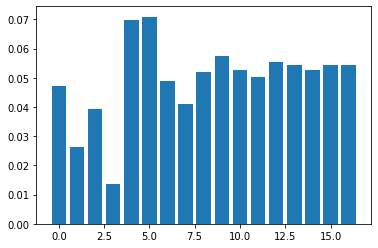

22


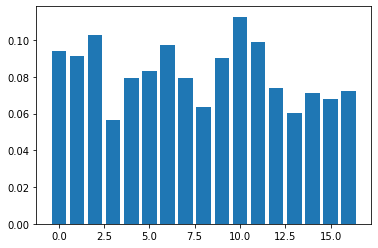

23


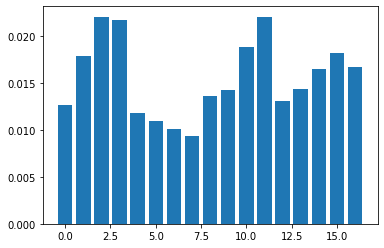

24


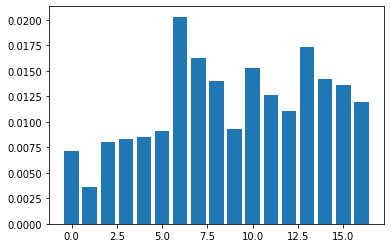

25


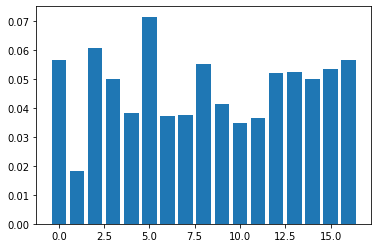

In [87]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month_trump[i][j]/len(trump_user_indices[i]) for i in range(17)])
    plt.show()


In [88]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_amounts_by_month_trump[i][j]/len(trump_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.8627450980392157
0.0002162452582765182

10
0.8039215686274511
0.002619224478027737

15
0.7794117647058825
0.005868162468593595



0


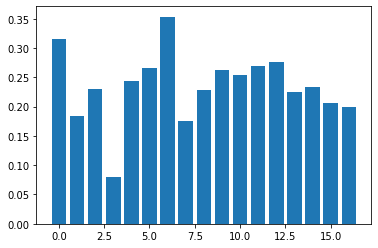

1


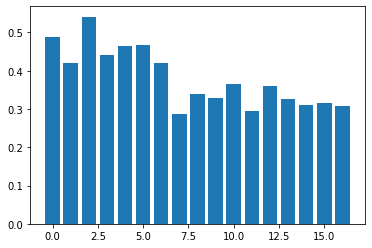

2


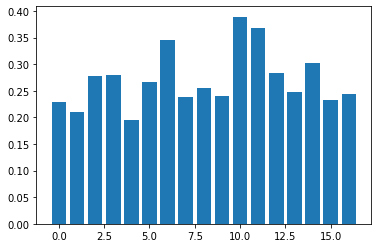

3


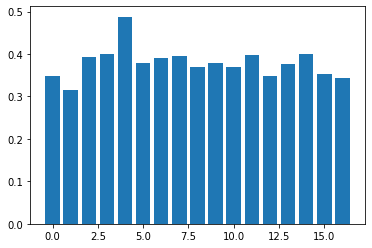

4


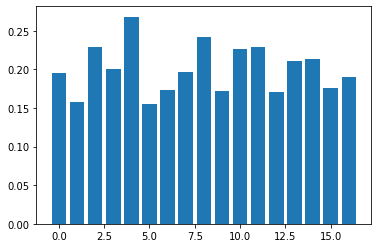

5


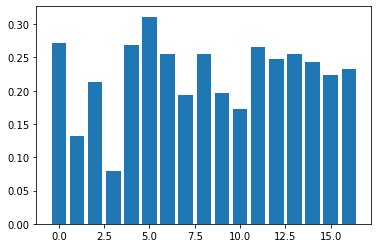

6


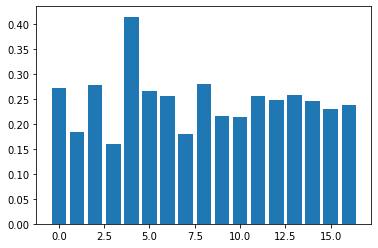

7


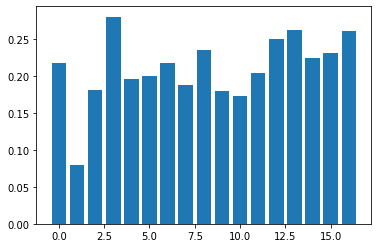

8


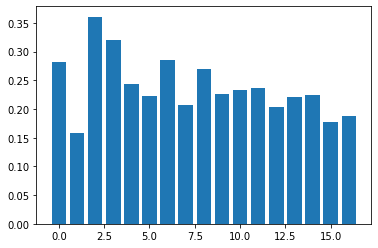

9


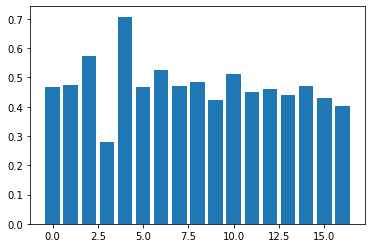

10


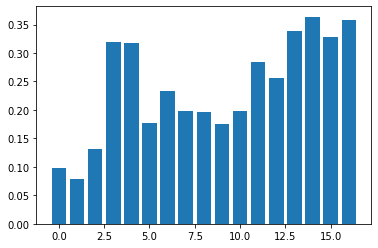

11


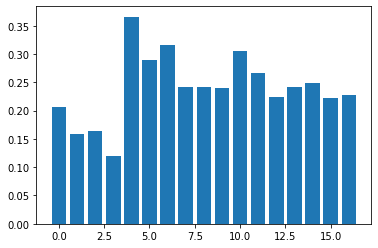

12


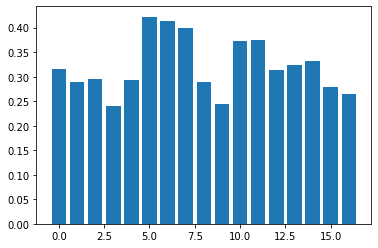

13


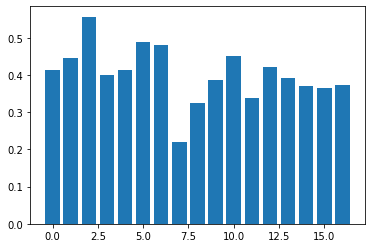

14


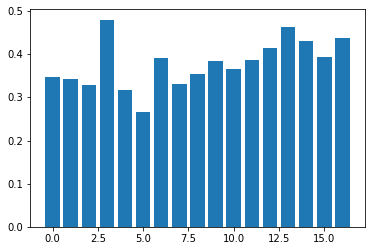

15


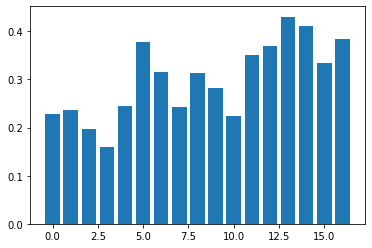

16


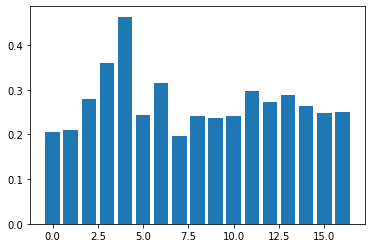

17


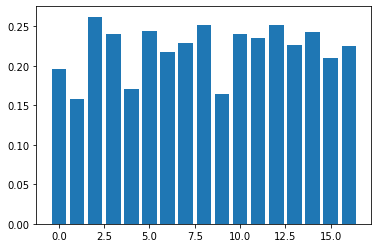

18


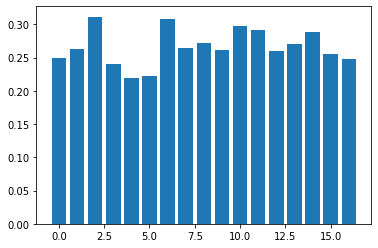

19


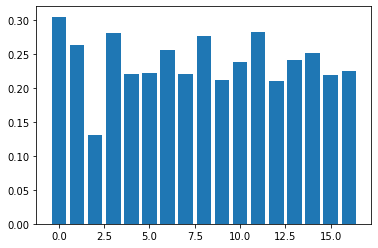

20


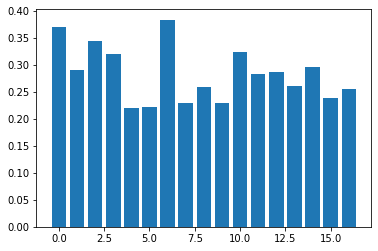

21


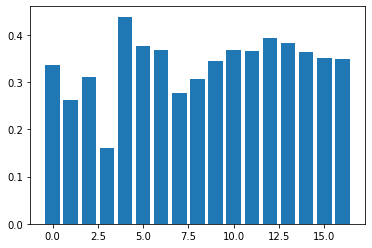

22


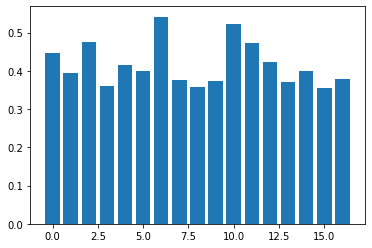

23


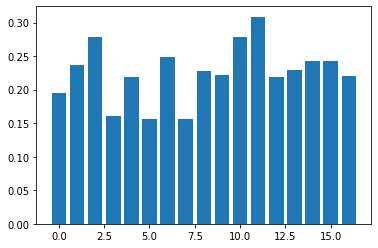

24


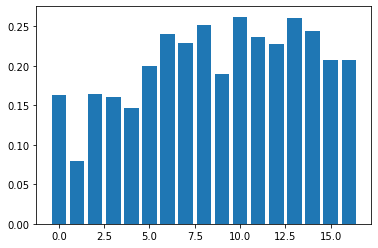

25


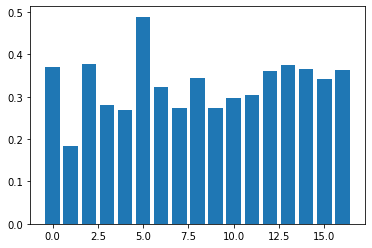

In [89]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month_trump[i][j]/len(trump_user_indices[i]) for i in range(17)])
    plt.show()


In [90]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_occurrence_by_month_trump[i][j]/len(trump_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.7811160266457745
0.005566307476320989

10
0.732843137254902
0.02128622718061696

15
0.7352941176470589
0.020021387861285676



### None

0


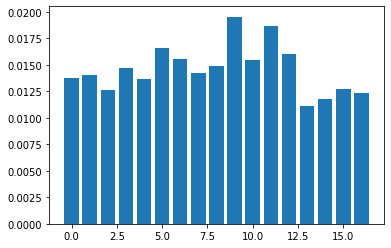

1


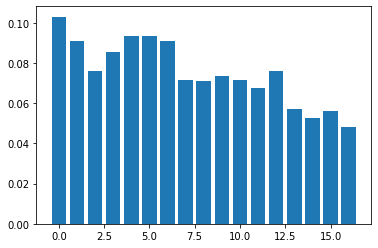

2


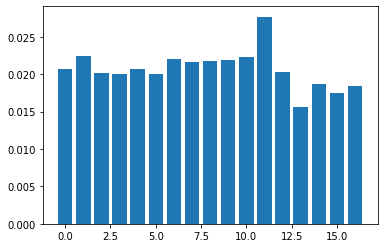

3


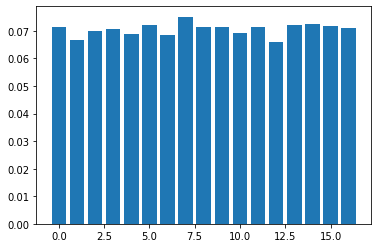

4


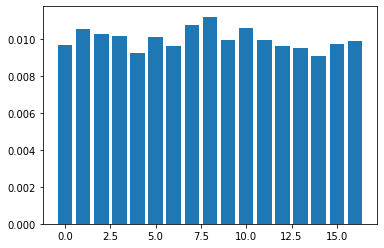

5


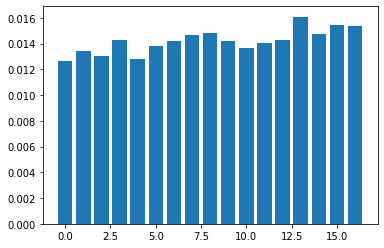

6


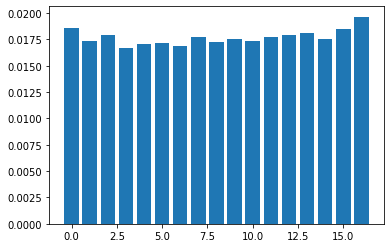

7


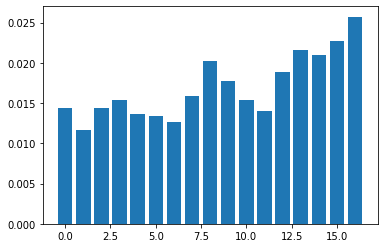

8


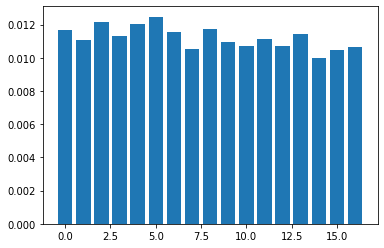

9


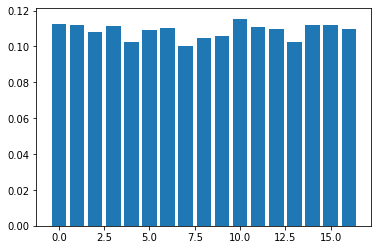

10


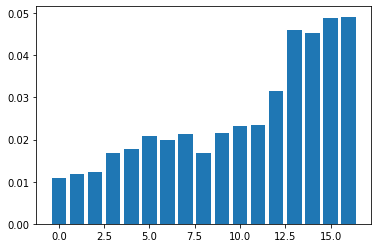

11


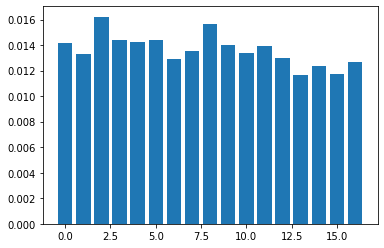

12


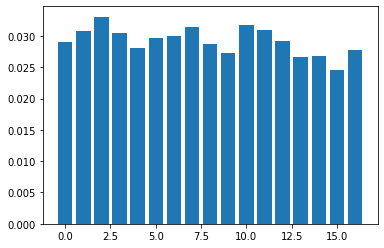

13


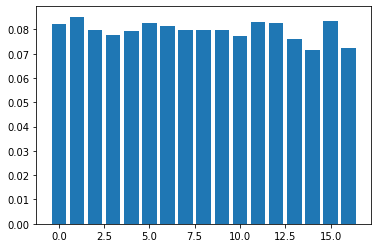

14


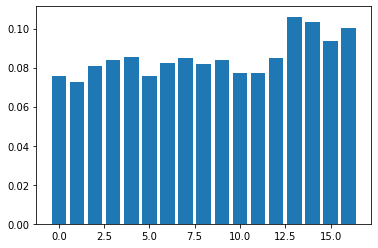

15


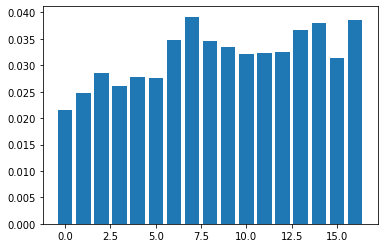

16


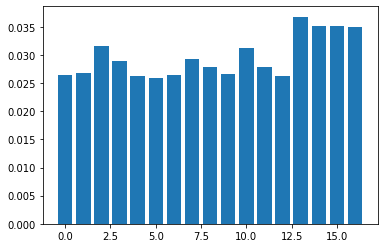

17


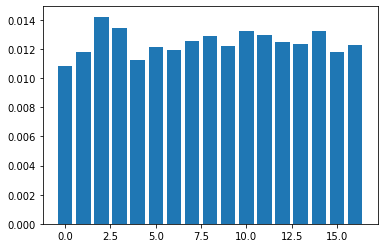

18


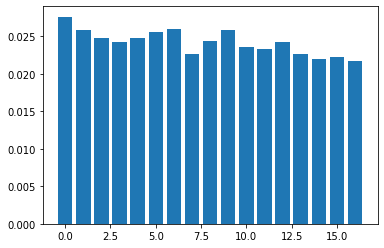

19


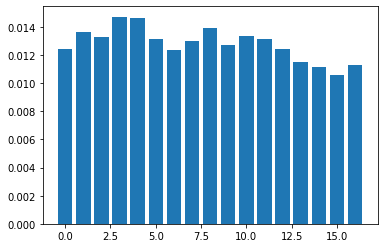

20


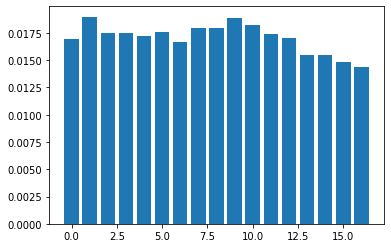

21


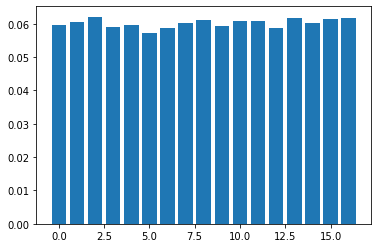

22


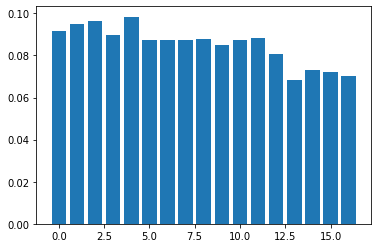

23


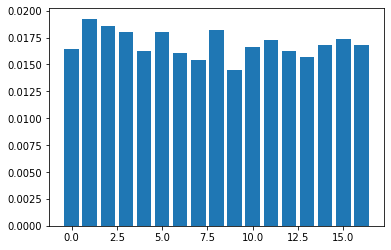

24


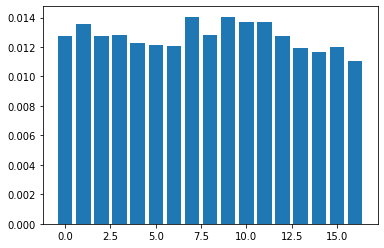

25


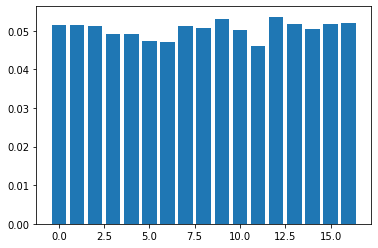

In [91]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_amounts_by_month_none[i][j]/len(none_user_indices[i]) for i in range(17)])
    plt.show()


In [92]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_amounts_by_month_none[i][j]/len(none_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.8823529411764707
7.220902878692295e-05

5
0.786764705882353
0.004657031290396742

7
0.7696078431372549
0.007883463774224778

10
0.9583333333333335
3.762177093239247e-08

18
-0.7916666666666667
0.003972158979723063

22
-0.8529411764705884
0.0003521417134477579



0


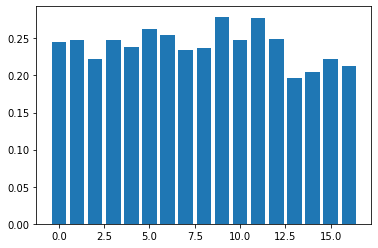

1


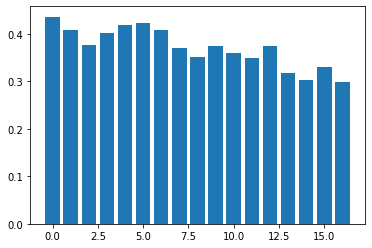

2


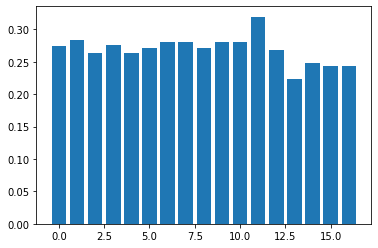

3


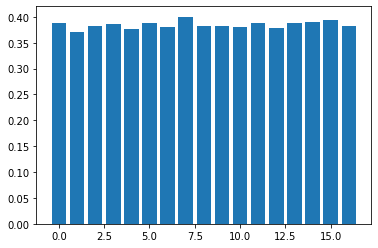

4


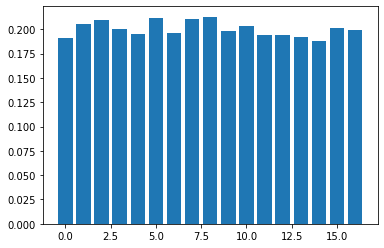

5


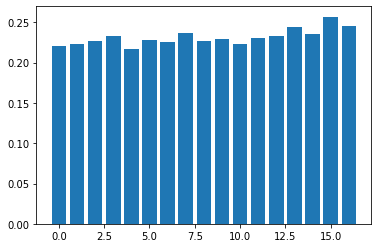

6


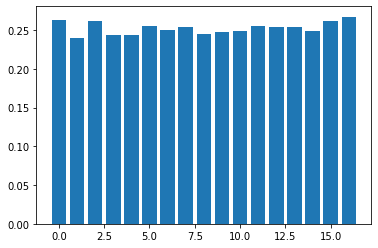

7


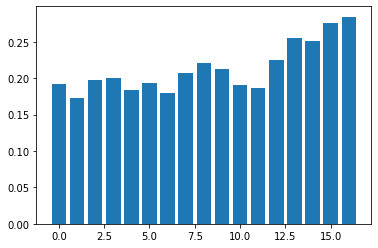

8


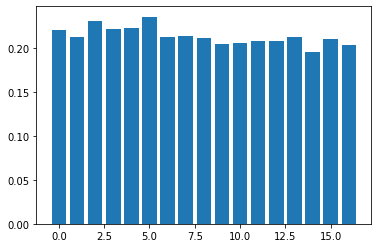

9


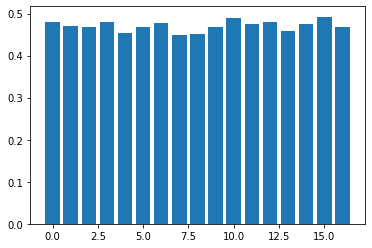

10


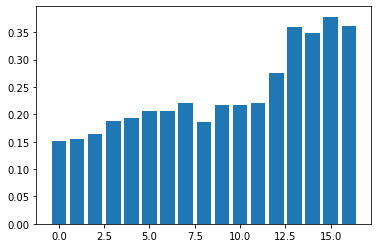

11


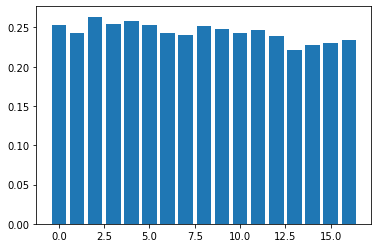

12


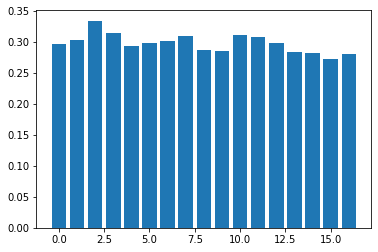

13


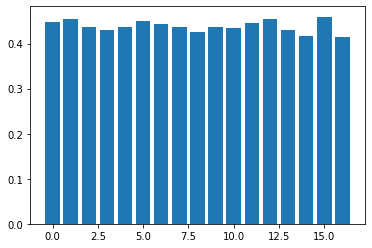

14


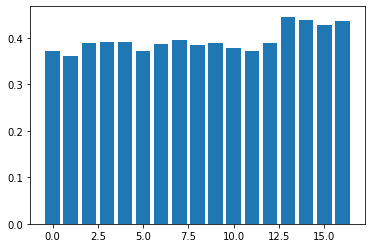

15


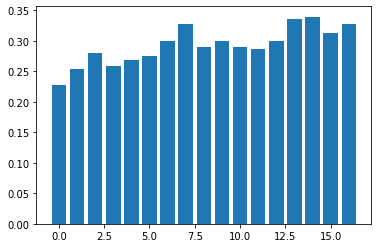

16


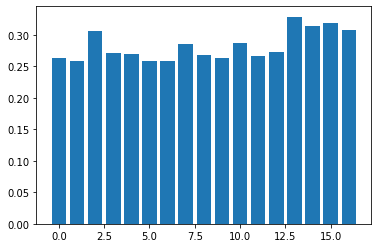

17


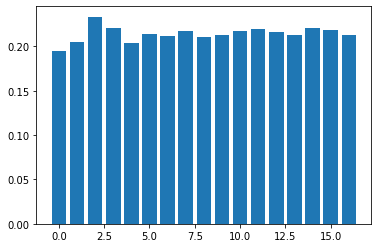

18


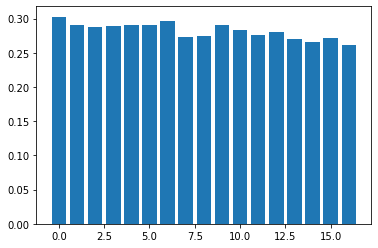

19


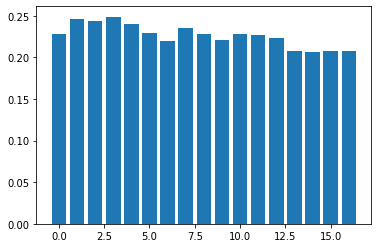

20


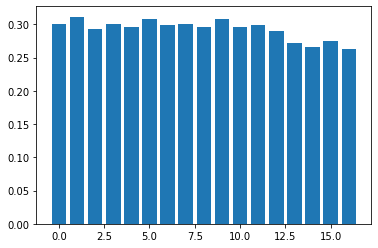

21


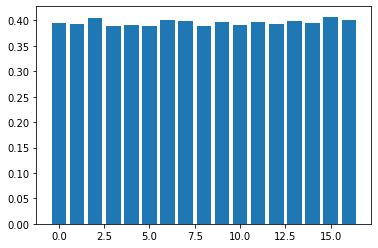

22


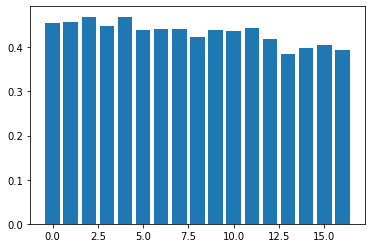

23


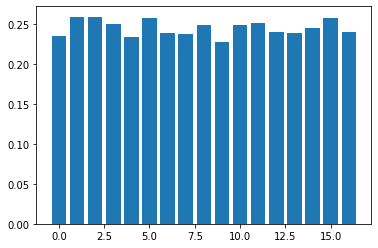

24


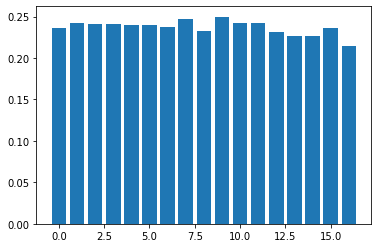

25


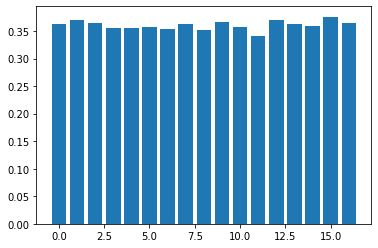

In [93]:
for j in range(26):
    print(j)
    plt.bar(range(17), [topic_occurrence_by_month_none[i][j]/len(none_user_indices[i]) for i in range(17)])
    plt.show()


In [94]:
for j in range(26):
    correlation, pvalue = spearmanr(range(17), [topic_occurrence_by_month_none[i][j]/len(none_user_indices[i]) for i in range(17)])
    
    # Bonferroni correction
    if (pvalue * 26) < 0.05:
        print(j)
        print(correlation)
        print(pvalue * 26)
        print()

1
-0.8848039215686275
6.211828098085225e-05

5
0.7132352941176472
0.03398854628878392

7
0.7279411764705883
0.024014809899967546

8
-0.7352941176470589
0.020021387861285676

10
0.9411764705882353
4.7516494756381544e-07

11
-0.8137254901960784
0.0018379227474516029

15
0.8431372549019609
0.0005545306063750275

18
-0.7941176470588236
0.0036627644203596583

19
-0.8284313725490197
0.001038000874535397

20
-0.7254901960784315
0.025483840495675696

22
-0.8823529411764707
7.220902878692295e-05

